In [2]:
# Pandas library is used for handling tabular data
import pandas as pd

# NumPy is used for handling numerical series operations (addition, multiplication, and ...)

import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing

# for visualizing the tree
import pydotplus
from IPython.display import Image

Use the command pd.read_excel to read the data and save it in a variable. Then, use the .head() function to print the first five rows of the data to ensure that we have read everything correctly.

In [3]:
launch_data = pd.read_excel('RocketLaunchDataCompleted.xlsx')
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN


The first step in cleaning your data is to replace all missing values with something.
first get an overview of the launch data by running this command 

In [4]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

Here are a few ways we'll clean the data:

The rows that don't have Y in the Launched column didn't have a rocket launch, so make those missing values N.
For rows missing information on whether the rocket was crewed or uncrewed, assume uncrewed. Uncrewed is more likely because there were fewer crewed missions.
For missing wind direction, mark it as unknown.
For missing condition data, assume it was a typical day and use fair.
For any other data, use a value of 0.
#use .fillna method of pandas to fill missing values w/c are NaN

In [5]:
## To handle missing values, we will fill the missing values with appropriate values 
launch_data['Launched?'].fillna('N',inplace=True)
launch_data['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)
launch_data['Wind Direction'].fillna('unknown',inplace=True)
launch_data['Condition'].fillna('Fair',inplace=True)
launch_data.fillna(0,inplace=True)
launch_data.head()
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          300 non-null    object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             300 non-null    object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            300 non-null    object        
 5   Launched?                     300 non-null    object        
 6   High Temp                     300 non-null    float64       
 7   Low Temp                      300 non-null    float64       
 8   Ave Temp                      300 non-null    float64       
 9   Temp at Launch Time           300 non-null    float64       
 10  Hist High Temp                300 non-null    float64       
 11  Hist Low Temp                 30

Data manipulation
Because computations are best suited for numerical inputs, convert all text into numbers. As an example, we'll use 1 if a rocket is crewed and 0 if a rocket is uncrewed.

In [7]:
## As part of the data cleaning process, we have to convert text data to numerical because computers understand only numbers
label_encoder = preprocessing.LabelEncoder()

# Three columns have categorical text info, and we convert them to numbers
launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])
#look at all the data again and verify that it has been cleaned
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,1,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,0,0
1,0,1958-12-05,0,Cape Canaveral,1,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,0,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,1,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,0,0
3,0,1958-12-07,0,Cape Canaveral,1,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,6,0
4,0,1958-12-08,0,Cape Canaveral,1,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,6,0


#a data scientist primarily involves exploring and analyzing data and the results of an analysis might form the basis of a report or a machine learning model.
NumPy and Pandas simplify analyzing and manipulating data
Matplotlib provides attractive data visualizations
Scikit-learn offers simple and effective predictive data analysis
TensorFlow and PyTorch supply machine learning and deep learning capabilities

#NumPy is a Python library that offers comprehensive mathematical functions
#Pandas is like excel for Python - providing easy-to-use functionality for data tables

#####
Data exploration and analysis is typically an iterative process. A data scientist takes a sample of data and performs the following kinds of task to analyze it and test hypotheses:
-Clean data to handle errors, missing values, and other issues.
-Apply statistical techniques to better understand the data, and how the sample might be expected to represent the real-world population of data, allowing for random variation.
-Visualize data to determine relationships between variables, and in ML project, identify features that are potentially predictive of the label.
-Revise the hypothesis and repeat the process.

Exploring data arrays with NumPy
Suppose a college takes a sample of student grades for a data science class.

In [1]:
data = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]
print(data)

[50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]


The data is loaded into a list structure good for data manipulation but not for data analysis so we'll have to use Numpy to work with
numbers. Below we load the data into a Numpy array.

In [2]:
import numpy as np

grades = np.array(data)
print(grades)

[50 50 47 97 49  3 53 42 26 74 82 62 37 15 70 27 36 35 48 52 63 64]


To observe the diffrence between a numpy array and a list let's run the code below

In [3]:
print (type(data),'x 2:', data * 2)
print('---')
print (type(grades),'x 2:', grades * 2)

<class 'list'> x 2: [50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64, 50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]
---
<class 'numpy.ndarray'> x 2: [100 100  94 194  98   6 106  84  52 148 164 124  74  30 140  54  72  70
  96 104 126 128]


So what we see is that the class type list being multiplied by two creates a list twice the size of the original while a numpy array 
is still the same size because each element acts like a vector and is multiplied by two. Hence, NumPy arrays are specifically designed to support mathematical operations on numeric data
Class of the numpy array is numpy.ndarray indicating it can have multiple dimensions.

To view the shape of the array:

In [4]:
grades.shape 

(22,)

We can see the array is one dimension containing 22 elements in the original list.
To get the first element we can use:

In [7]:
grades[0]


50

To get the average mean value:

In [8]:
grades.mean()

49.18181818181818

Let's add a second set of data for the same students, this time recording the typical number of hours per week they devoted to studying.

In [9]:
# Define an array of study hours
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,
               13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]

# Create a 2D array (an array of arrays)
student_data = np.array([study_hours, grades])

# display the array
student_data

array([[10.  , 11.5 ,  9.  , 16.  ,  9.25,  1.  , 11.5 ,  9.  ,  8.5 ,
        14.5 , 15.5 , 13.75,  9.  ,  8.  , 15.5 ,  8.  ,  9.  ,  6.  ,
        10.  , 12.  , 12.5 , 12.  ],
       [50.  , 50.  , 47.  , 97.  , 49.  ,  3.  , 53.  , 42.  , 26.  ,
        74.  , 82.  , 62.  , 37.  , 15.  , 70.  , 27.  , 36.  , 35.  ,
        48.  , 52.  , 63.  , 64.  ]])

This forms a 2 dimensional numpy array or ana array of arrays. We can observe the shape:

In [11]:
student_data.shape

(2, 22)

The student_data array contains two elements, each of which is an array containing 22 elements.

To navigate this structure, you need to specify the position of each element in the hierarchy. So to find the first value in the first array (which contains the study hours data), you can use the following code

In [12]:
student_data[0][0]

10.0

To observe how does the mean study time compare to the mean grade:

In [13]:
# Get the mean value of each sub-array
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

print('Average study hours: {:.2f}\nAverage grade: {:.2f}'.format(avg_study, avg_grade))

Average study hours: 10.52
Average grade: 49.18


When you start to deal with two-dimensional tables of data, the Pandas package offers a more convenient structure to work with 
known as the DataFrame.
The following cell creates a Data Frame with 3 columns by importing pandas containing a list of student names, and the second and third columns are the NumPy arrays containing the study time and grade data.

In [14]:
import pandas as pd

df_students = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny',
                                     'Jakeem','Helena','Ismat','Anila','Skye','Daniel','Aisha'],
                            'StudyHours':student_data[0],
                            'Grade':student_data[1]})

df_students 

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


DataFrame includes an index to uniqueinteger value to identify each row.

In [15]:
# Get the data for a specific index value 
df_students.loc[5]

Name          Vicky
StudyHours      1.0
Grade           3.0
Name: 5, dtype: object

In [16]:
#get the data at a range of index values i.e
# Get the rows with index values from 0 to 5
df_students.loc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0


In [17]:
# Get data in the first five rows
df_students.iloc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


iloc identifies data values in a DataFrame by position, which extends beyond rows to columns. So for example, you can use it to find the values for the columns in positions 1 and 2 in row 0, like this:

In [18]:
df_students.iloc[0,[1,2]]

StudyHours    10.0
Grade         50.0
Name: 0, dtype: object

loc is used to locate data items based on index values rather than positions.
In the absence of an explicit index column, the rows in our dataframe are indexed as integer values, but the columns are identified by name:

In [19]:
df_students.loc[0,'Grade']

50.0

You can use the loc method to find indexed rows based on a filtering expression that references named columns other than the index, like this:

In [20]:
#this still works without using loc
df_students.loc[df_students['Name']=='Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


In [25]:
#can achieve the same results by using the DataFrame's query method,
df_students.query('Name=="Aisha"')

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


In [28]:
#using the column as a property of the DataFrame
df_students[df_students.Name == 'Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


In many real-world scenarios, data is loaded from sources such as files. Let's replace the student grades DataFrame with the contents of a text file.

In [1]:
import pandas as pd
import numpy as np
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')
df_students.head()

--2022-11-04 12:24:25--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: 'grades.csv.3'

     0K                                                       100% 2.93M=0s

2022-11-04 12:24:26 (2.93 MB/s) - 'grades.csv.3' saved [322/322]



,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


The DataFrame's read_csv method is used to load data from text files. As you can see in the example code, you can specify options such as the column delimiter and which row (if any) contains column headers (in this case, the delimiter is a comma and the first row contains the column names by default.

You can use the isnull method to identify which individual values are null or missing values in the DataFrame 

In [2]:
df_students.isnull()

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


with a larger DataFrame get the sum of missing values for each column

In [5]:
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

To see them in context, we can filter the dataframe to include only rows where any of the columns 
(axis 1 of the DataFrame) are null.

In [3]:
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


now that we've found the null values we can impute replacement values
if the number of study hours is missing, replace the missing value with the mean study hours. To do this, we can use the fillna method, like this:

In [4]:
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())
df_students

,Name,StudyHours,Grade
0,Dan,10.000000,50.0
1,Joann,11.500000,50.0
2,Pedro,9.000000,47.0
3,Rosie,16.000000,97.0
4,Ethan,9.250000,49.0
5,Vicky,1.000000,3.0
6,Frederic,11.500000,53.0
7,Jimmie,9.000000,42.0
8,Rhonda,8.500000,26.0
9,Giovanni,14.500000,74.0


It good to only use data you know is correct so we can drop rows or columns that have null values using the dropna

In [5]:
#In this case, we'll remove rows (axis 0 of the DataFrame) where any of the columns contain null values.
df_students = df_students.dropna(axis=0, how='any')
df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [6]:
#After finishing cleaning the data we can start exploring it

# Get the mean study hours using to column name as an index
mean_study = df_students['StudyHours'].mean()

# Get the mean grade using the column name as a property (just to make the point!)
mean_grade = df_students.Grade.mean()

# Print the mean study hours and mean grade
print('Average weekly study hours: {:.2f}\nAverage grade: {:.2f}'.format(mean_study, mean_grade))

Average weekly study hours: 10.52
Average grade: 49.18


In [7]:
# Get students who studied for the mean or more hours
df_students[df_students.StudyHours > mean_study]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


In [11]:
#let's find the average grade for students who undertook more than the average amount of study time.
df_students[df_students.StudyHours > mean_study].Grade.mean()

66.7

Let's assume that the passing grade for the course is 60.

We can use that information to add a new column to the DataFrame, indicating whether or not each student passed.

First, we'll create a Pandas Series containing the pass/fail indicator (True or False), and then we'll concatenate that series as a new column (axis 1) in the DataFrame.

In [8]:
passes  = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


DataFrames are designed for tabular data so use the groupby method to group the student data into groups 
based on the Pass column you added previously, and count the number of names in each group - 
in other words, you can determine how many students passed and failed.

In [9]:
print(df_students.groupby(df_students.Pass).Name.count())

Pass
False    15
True      7
Name: Name, dtype: int64


To find the mean study time and grade for the groups of students who passed and failed the course.

In [10]:
print(df_students.groupby(df_students.Pass)['StudyHours', 'Grade'].mean())

C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_3320\2502225861.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df_students.groupby(df_students.Pass)['StudyHours', 'Grade'].mean())


       StudyHours      Grade
Pass                        
False    8.783333  38.000000
True    14.250000  73.142857


Many DataFrame operations return a new copy of the DataFrame; so if you want to modify a DataFrame but keep the existing variable, you need to assign the result of the operation to the existing variable.

In [11]:
# Create a DataFrame with the data sorted by Grade (descending)
df_students = df_students.sort_values('Grade', ascending=False)

# Show the DataFrame
df_students

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


Visualize data

Data scientists visualize data to understand it better. Graphs are a powerful means of viewing data without needing to define mathematical summary measures.

Representing data visually typically means graphing it. This is done to provide a fast qualitative assessment of our data, which can be useful for understanding results, finding outlier values, understanding how numbers are distributed, and so on.

Graphs are not limited to bar graphs and also include proportions - shown through pie charts, stacked bar graphs - how data are spread - with histograms, box and whisker plots - and how two data sets differ. 

The Matplotlib library provides the foundation for plotting data visualizations that can greatly enhance your ability to analyze the data.

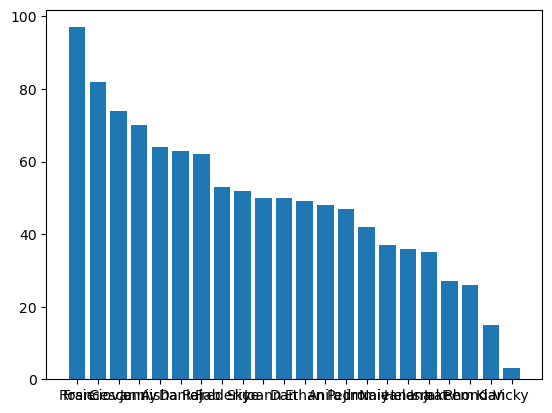

In [18]:
#Bar graph to show the grade of each student
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

# Display the plot
plt.show()

Pyplot class from matplotlib offers the following features to better improve visual elements of our plot
-Specifies the color of the bar chart.
-Adds a title to the chart (so we know what it represents)
-Adds labels to the X and Y (so we know which axis shows which data)
-Adds a grid (to make it easier to determine the values for the bars)
-Rotates the X markers (so we can read them)

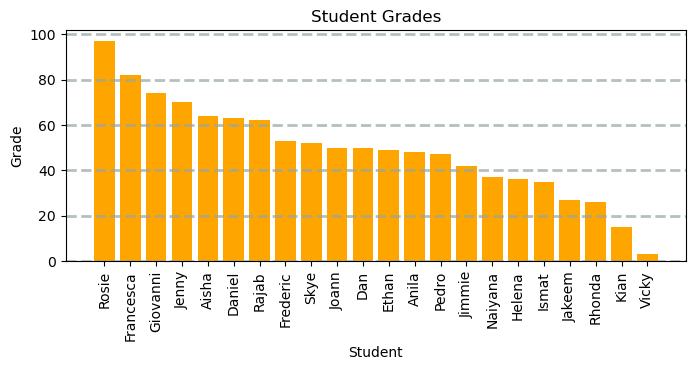

In [48]:
# Create a bar plot of name vs grade
fig = plt.figure(figsize=(8,3))
#fig helps creates a figure with a specific size explicitly  
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_6688\3087693725.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)
C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_6688\3087693725.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


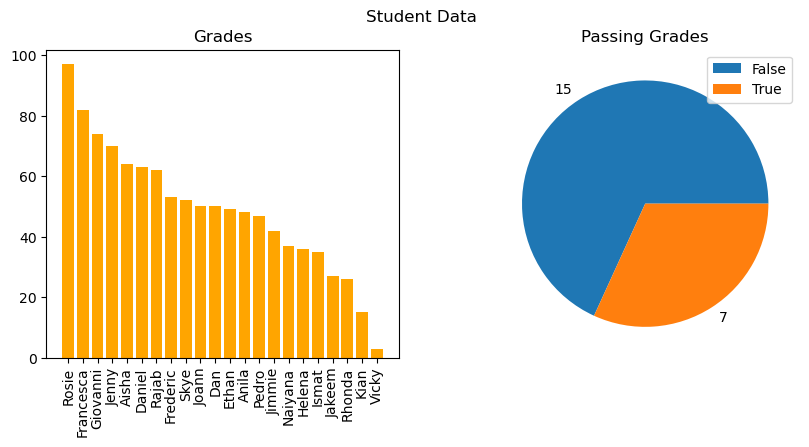

In [49]:
#A figure can contain multiple subplots each on its own axis
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
fig.show()

DataFrame provides its own methods for plotting data

<AxesSubplot:xlabel='Name'>

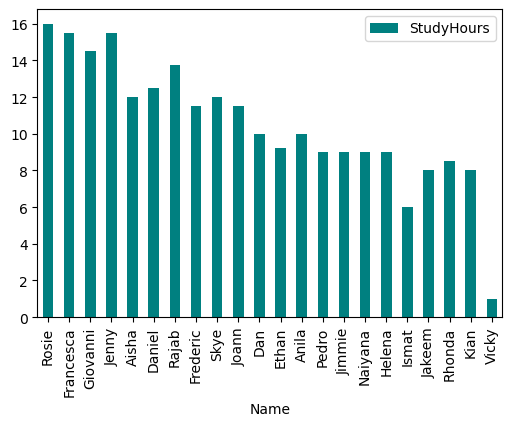

In [16]:
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

When examining a variable (for example a sample of student grades), data scientists are particularly interested in its distribution (in other words, how are all the different grade values spread across the sample). The starting point for this exploration is often to visualize the data as a histogram, and see how frequently each value for the variable occurs.

C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_7696\4182697007.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


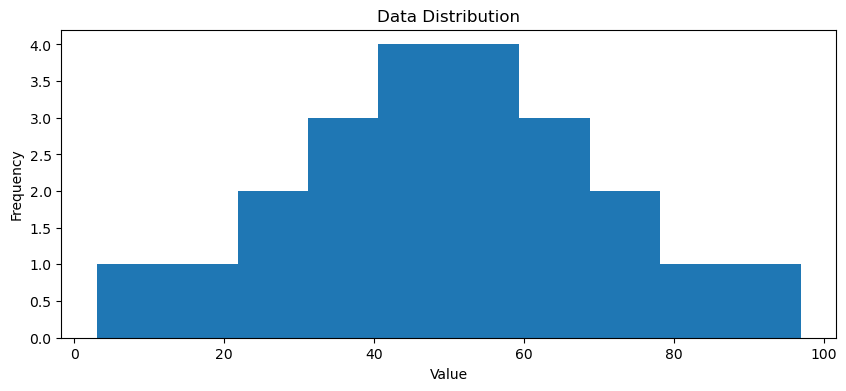

In [19]:
# Get the variable to examine
var_data = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

Measures of central tendency
The goal of this is to try to find a "typical" value or a middle value
Common ways to find the middle of the data include
The mean: A simple average based on adding together all of the values in the sample set, and then dividing the total by the number of samples.
The median: The value in the middle of the range of all of the sample values.
The mode: The most commonly occuring value in the sample set*.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_7696\2664441753.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


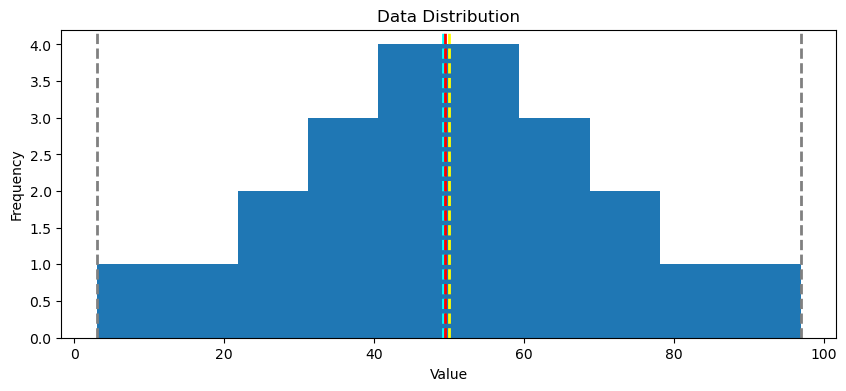

In [20]:
# Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_7696\331031479.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


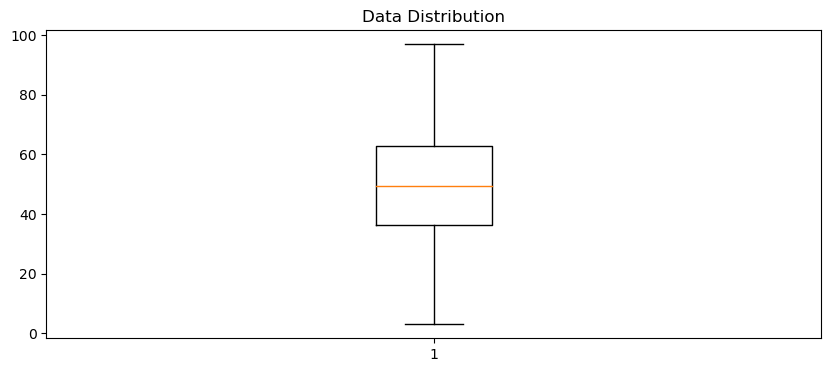

In [21]:
#Another way to visualize the data is to use a box plot
# Get the variable to examine
var = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

The box part of the plot shows where the inner two quartiles of the data reside - so in this case, half of the grades are between approximately 36 and 63. The whiskers extending from the box show the outer two quartiles; so the other half of the grades in this case are between 0 and 36 or 63 and 100. The line in the box indicates the median value.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_7696\1918122812.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


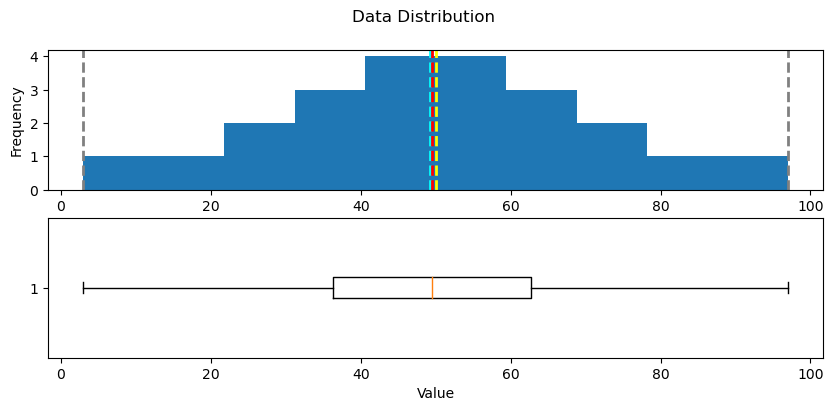

In [22]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)
#All of the measurements of central tendency are right in the middle of the data distribution,
#which is symmetric with values becoming progressively lower in both directions from the middle.

Sample refers to data on hand while population refers to all possiible to all possible data we could collect.
If we have enough samples, we can calculate a probability density function, which estimates the distribution of grades for the full population.

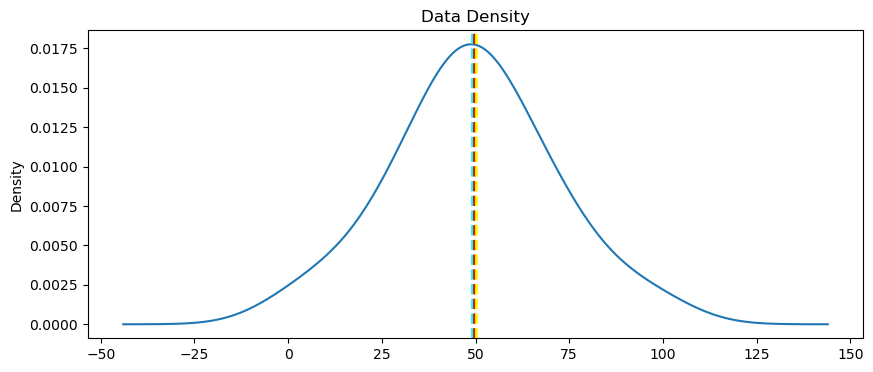

In [12]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_students['Grade']
show_density(col)

The density shows the characteristic "bell curve" above is what statisticians call a normal distribution with the mean and mode at the center and symmetric tails.

Real-world data will always have issues but there are measures  that can be taken to correct it:Check for missing values and badly recorded data
-Consider removal of obvious outliers(data points that are clearly outside of what is expected)
-Consider what real-world factors might affect your analysis and consider if your dataset size is large enough to handle this
-Check for biased(tendency to select certain types of values more frequently than others) raw data and consider your options to fix this, if found


--2022-11-07 10:02:30--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: 'grades.csv.5'

     0K                                                       100% 3.01M=0s

2022-11-07 10:02:31 (3.01 MB/s) - 'grades.csv.5' saved [322/322]



         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True
Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_3264\1194672738.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


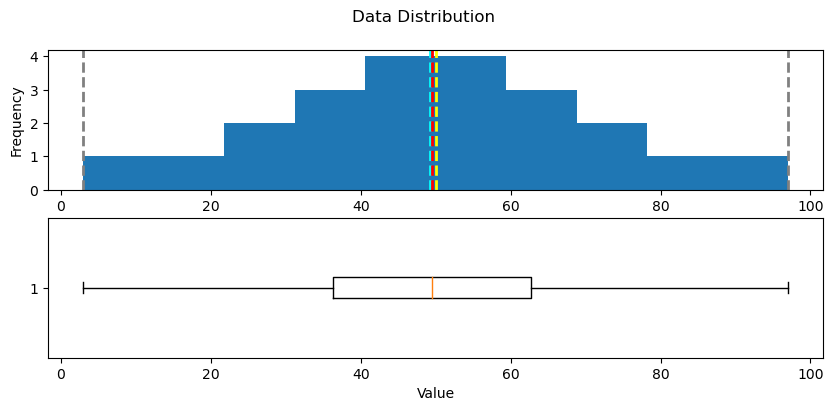

In [1]:
#Explore real world data
import pandas as pd
from matplotlib import pyplot as plt

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
print(df_students)


# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


show_distribution(df_students['Grade'])

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_3264\1194672738.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


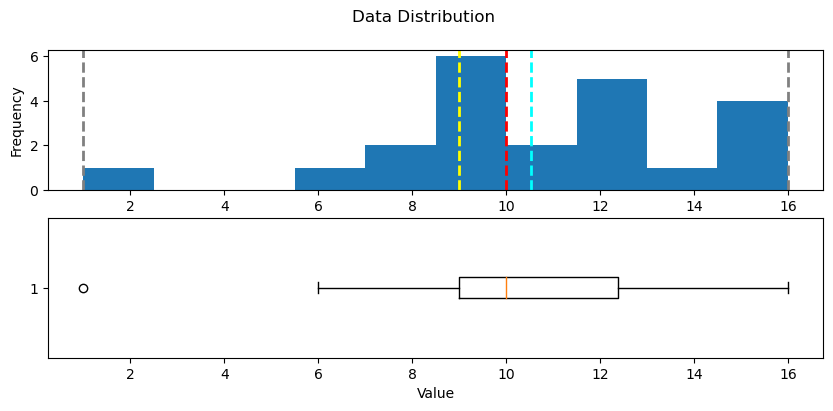

In [2]:
# Get the variable to examine
col = df_students['StudyHours']
# Call the function
show_distribution(col)

Note that the whiskers of the box plot only begin at around 6.0, indicating that the vast majority of the first quarter of the data is above this value. The minimum is marked with an o, indicating that it is statistically an outlier - a value that lies significantly outside the range of the rest of the distribution.

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_3264\1194672738.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


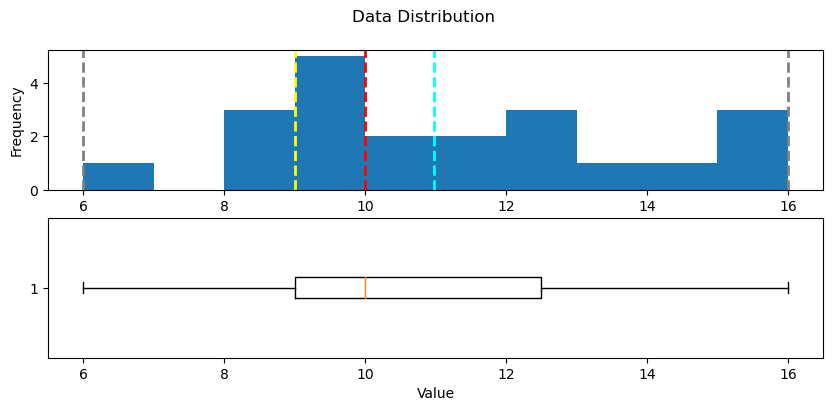

In [3]:
# Get the variable to examine
# We will only get students who have studied more than one hour i.e without the outlier
col = df_students[df_students.StudyHours>1]['StudyHours']

# Call the function
show_distribution(col)

When we have more data available, our sample becomes more reliable. This makes it easier to consider outliers as being values that fall below or above percentiles within which most of the data lie. For example, the following code uses the Pandas quantile function to exclude observations below the 0.01th percentile (the value above which 99% of the data reside).

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_3264\1194672738.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


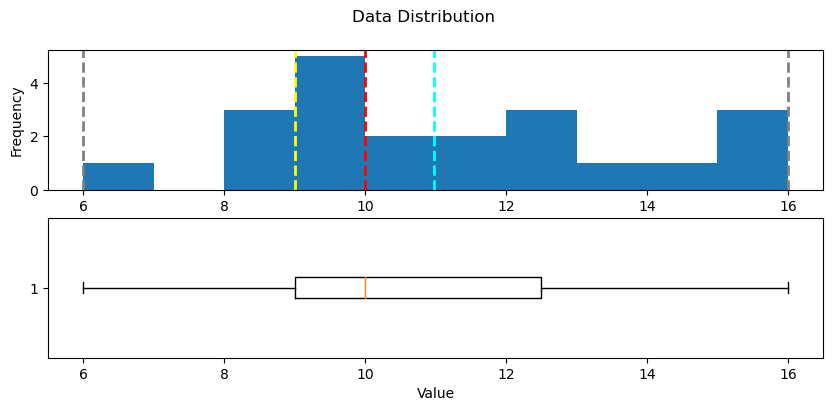

In [4]:
# calculate the 0.01th percentile
q01 = df_students.StudyHours.quantile(0.01)
# Get the variable to examine
col = df_students[df_students.StudyHours>q01]['StudyHours']
# Call the function
show_distribution(col)

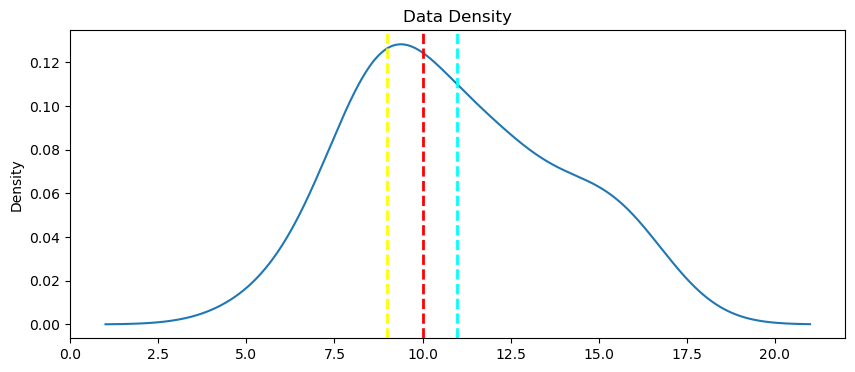

In [5]:
#see density of the distribution
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of StudyHours
show_density(col)

This kind of distribution is called right skewed. The mass of the data is on the left side of the distribution, creating a long tail to the right because of the values at the extreme high end; which pull the mean to the right.

Measures of variance

Measures of variance include:
Range: The difference between the maximum and minimum. There's no built-in function for this, but it's easy to calculate using the min and max functions.
Variance: The average of the squared difference from the mean. You can use the built-in var function to find this.
Standard Deviation: The square root of the variance. You can use the built-in std function to find this.

*Standard deviation is generally the most useful as it provides a measure of variance in the data on the same scale as the data itself (so grade points for the Grade distribution and hours for the StudyHours distribution). The higher the standard deviation, the more variance there is when comparing values in the distribution to the distribution mean - in other words, the data is more spread out.

In [6]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


Normal distrubution is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.
When working with a normal distribution, the standard deviation works with the particular characteristics of a normal distribution to provide even greater insights.

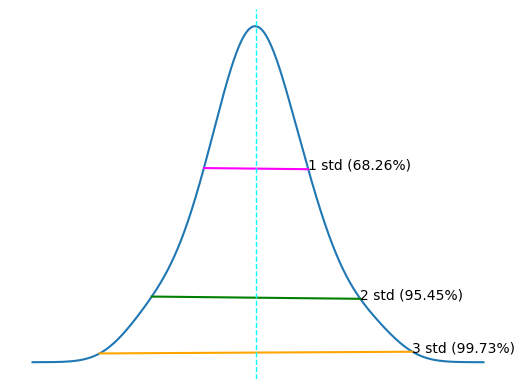

In [7]:
#Can help show the relationship between standard deviations and the data in the normal distribution.
import scipy.stats as stats

# Get the Grade column
col = df_students['Grade']

# get the density
density = stats.gaussian_kde(col)

# Plot the density
col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1,y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off')

plt.show()

The horizontal lines show the percentage of data within 1, 2, and 3 standard deviations of the mean (plus or minus).

In any normal distribution:

Approximately 68.26% of values fall within one standard deviation from the mean.
Approximately 95.45% of values fall within two standard deviations from the mean.
Approximately 99.73% of values fall within three standard deviations from the mean.
So, since we know that the mean grade is 49.18, the standard deviation is 21.74, and distribution of grades is approximately normal; we can calculate that 68.26% of students should achieve a grade between 27.44 and 70.92.

In [8]:
#A built-in Describe method of the DataFrame object that returns the main descriptive statistics for all numeric columns.
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


Comparing data

Let's get rid of any rows that contain outliers so that we have a sample that is representative of a typical class of students. We identified that the StudyHours column contains some outliers with extremely low values, so we'll remove those rows.

In [9]:
df_sample = df_students[df_students['StudyHours']>1]
df_sample

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True


Let's compare the numeric StudyHours column to the categorical Pass column to see if there exists a r/nship.
To make this comparison, let's create box plots showing the distribution of StudyHours for each possible Pass value (true and false).

<AxesSubplot:title={'center':'StudyHours'}, xlabel='Pass'>

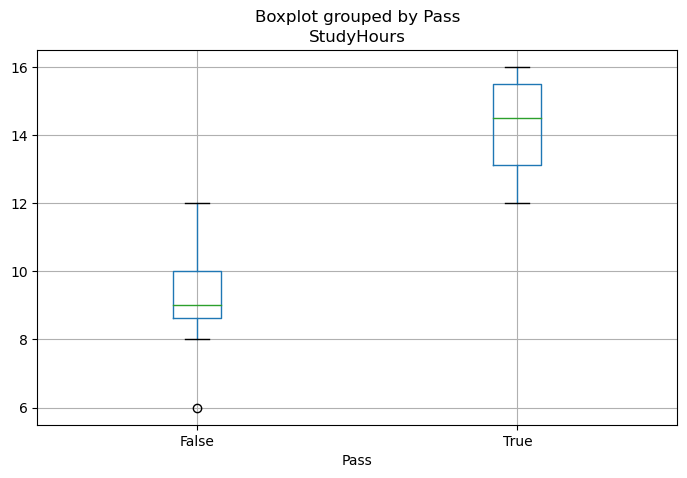

In [10]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))
#Comparing the StudyHours distributions, it's obvious that
# that students who passed the course tended to study for more hours than students who didn't

Comparing numeric variables

<AxesSubplot:xlabel='Name'>

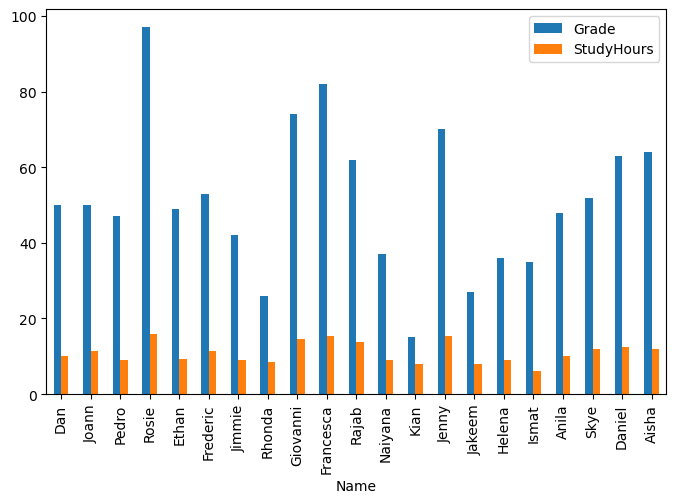

In [11]:
# Create a bar plot of name vs grade and study hours
df_sample.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

The chart shows bars for both grade and study hours for each student; but it's not easy to compare because the values 
are on different scales. Grades are measured in grade points, and range from 3 to 97; while study time is measured 
in hours and ranges from 1 to 16.

The chart shows bars for both grade and study hours for each student; but it's not easy to compare because the values are on different scales. Grades are measured in grade points, and range from 3 to 97; while study time is measured in hours and ranges from 1 to 16

<AxesSubplot:xlabel='Name'>

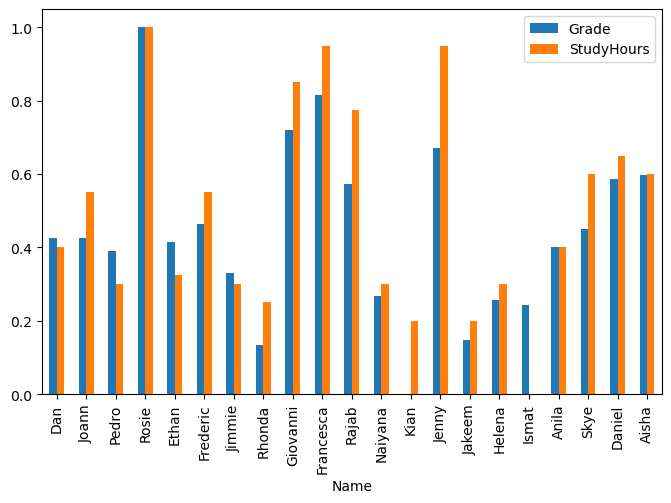

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

With the data normalized, it's easier to see an apparent relationship between grade and study time. It's not an exact match, but it definitely seems like students with higher grades tend to have studied more.

ธhere's a statistical correlation measurement we can use to quantify the relationship between these columns.

In [13]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9117666413789677

The correlation statistic is a value between -1 and 1 that indicates the strength of a relationship. Values above 0 indicate a positive correlation (high values of one variable tend to coincide with high values of the other), while values below 0 indicate a negative correlation (high values of one variable tend to coincide with low values of the other). In this case, the correlation value is close to 1; showing a strongly positive correlation between study time and grade.

์์์์์NB:Data scientists often quote the maxim "correlation is not causation". In other words, as tempting as it might be, you shouldn't interpret the statistical correlation as explaining why one of the values is high. 

<AxesSubplot:title={'center':'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

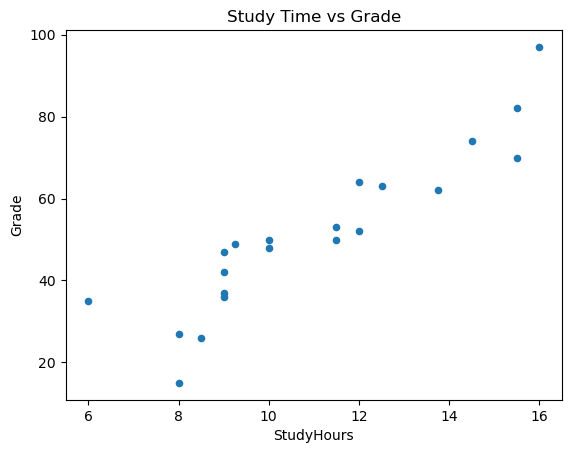

In [14]:
#Another way to visualize the corelation is to create a scatter plot
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

We can see this more clearly by adding a regression line (or a line of best fit) to the plot that shows the general trend in the data. To do this, we'll use a statistical technique called least squares regression.

y=mx+b
In this equation, y and x are the coordinate variables, m is the slope of the line, and b is the y-intercept (where the line goes through the Y-axis).In the case of our scatter plot for our student data, we already have our values for x (StudyHours) and y (Grade), so we just need to calculate the intercept and slope of the straight line that lies closest to those points. Then we can form a linear equation that calculates a new y value on that line for each of our x (StudyHours) values - to avoid confusion, we'll call this new y value f(x) (because it's the output from a linear equation function based on x). The difference between the original y (Grade) value and the f(x) value is the error between our regression line and the actual Grade achieved by the student. Our goal is to calculate the slope and intercept for a line with the lowest overall error.Specifically, we define the overall error by taking the error for each point, squaring it, and adding all the squared errors together. The line of best fit is the line that gives us the lowest value for the sum of the squared errors - hence the name least squares regression.

The SciPy package includes a stats class that provides a linregress method to do the hard work for you. This returns (among other things) the coefficients you need for the slope equation - slope (m) and intercept (b) based on a given pair of variable samples you want to compare.

slope: 6.3134
y-intercept: -17.9164
so...
 f(x) = 6.3134x + -17.9164


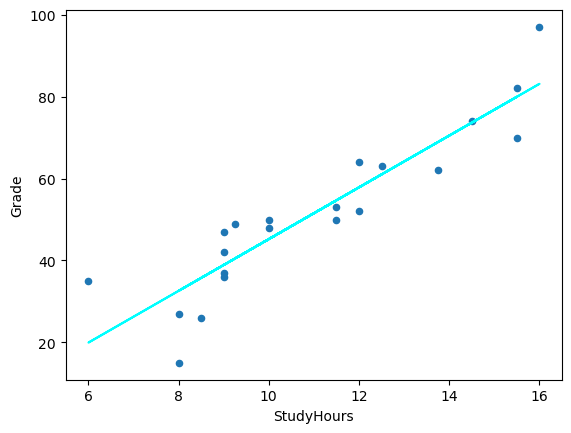

In [15]:
from scipy import stats

#
df_regression = df_sample[['Grade', 'StudyHours']].copy()

# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='cyan')

# Display the plot
plt.show()

In [16]:
# Show the original x,y values, the f(x) value, and the error
df_regression[['StudyHours', 'Grade', 'fx', 'error']]

,StudyHours,Grade,fx,error
0,10.00,50.0,45.217846,-4.782154
1,11.50,50.0,54.687985,4.687985
2,9.00,47.0,38.904421,-8.095579
3,16.00,97.0,83.098400,-13.901600
4,9.25,49.0,40.482777,-8.517223
6,11.50,53.0,54.687985,1.687985
7,9.00,42.0,38.904421,-3.095579
8,8.50,26.0,35.747708,9.747708
9,14.50,74.0,73.628262,-0.371738
10,15.50,82.0,79.941687,-2.058313


Now that you have the regression coefficients for the study time and grade relationship, you can use them in a function to estimate the expected grade for a given amount of study.

In [17]:
# Define a function based on our regression coefficients
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 14

# Get f(x) for study time
prediction = f(study_time)

# Grade can't be less than 0 or more than 100
expected_grade = max(0,min(100,prediction))

#Print the estimated grade
print ('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))

Studying for 14 hours per week may result in a grade of 70


ML's predictive power comes from the fact that it's shaped by data.
Models trained only on small amounts of data rarely perform well in the real-world. 
However, it's not all about quantity i.e datasets aren't just large but representative, don't contain errors and aren't missing key information

Statisticians rely on two key concepts: populations and samples, which help us to think about if the data we have is what we want.
A population is what we are interested in or, if you like, in every conceivable datapoint. 
A sample refers to data that we have available (a subset of the population).
It's important to think about whether your sample is representative of (‘like’) the population.

Data errors simply mean data that is wrong i.e if you put bad data in, you’ll get bad predictions out. Errors in data come from two places:
Measurement errors mean that when the data was collected, they were measured badly; subtle and difficult or impossible to eliminate.
Data entry errors mean data was collected correctly but entered into a spreadsheet, or similar, incorrectly; easier to spot than measurement errors.

A dataset that is complete has no missing data. Data can be missing in two ways either an entire row is missing or missing a column.

Ideally, we always work with complete data, but not realistic. When we have incomplete data, we can:

Choose a model that can work with incomplete data (best option), or
Remove samples (rows) that have incomplete data, and work with what remains (be careful to not cause a loss of sample to misrepresent the population), or
Artificially add values that are missing with reasonable substitutes (last resort).

In [2]:
import pandas as pd
!pip install missingno

# Load data from our dataset file into a pandas dataframe
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
dataset = pd.read_csv('titanic.csv', index_col=False, sep=",", header=0)

# Let's take a look at the data
dataset.head()


--2022-11-07 11:27:14--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: 'titanic.csv.1'

     0K .......... .......... .......... .......... .......... 83%  427K 0s
    50K .........                                             100% 1.12M=0.1s

2022-11-07 11:27:15 (476 KB/s) - 'titanic.csv.1' saved [61194/61194]

--2022-11-07 11:27:15--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Shape tells us how many rows and columns we have
print(dataset.shape)

(891, 12)


In [4]:
# Calculate the number of empty cells in each column
# The following line consists of three commands. Try
# to think about how they work together to calculate
# the number of missing entries per column
missing_data = dataset.isnull().sum().to_frame()

# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})

# Print the results
print(missing_data)

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2


<AxesSubplot:>

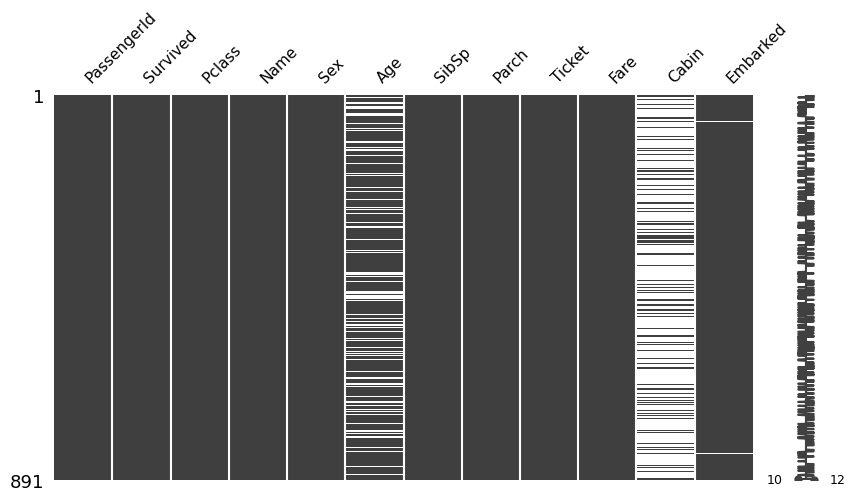

In [5]:
#To visualise whether missing data form some kind of pattern by plotting gaps in the dataset
# import missingno package
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(dataset, figsize=(10,5), fontsize=11)

In [6]:
# Select Passengers with unknown age
# Notice how we use .isnull() rows with no value
unknown_age = dataset[dataset["Age"].isnull()]

# Print only the colums we want for the moment (to better fit the screen)
# limit output to 20 rows
unknown_age[["PassengerId","Name", "Survived", "Age"]][:20]

,PassengerId,Name,Survived,Age
5,6,"Moran, Mr. James",0,NaN
17,18,"Williams, Mr. Charles Eugene",1,NaN
19,20,"Masselmani, Mrs. Fatima",1,NaN
26,27,"Emir, Mr. Farred Chehab",0,NaN
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN
29,30,"Todoroff, Mr. Lalio",0,NaN
31,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN
32,33,"Glynn, Miss. Mary Agatha",1,NaN
36,37,"Mamee, Mr. Hanna",1,NaN
42,43,"Kraeff, Mr. Theodor",0,NaN


In [7]:
# Find those missing age or cabin information
missing_age = dataset["Age"].isnull()
missing_cabin = dataset["Cabin"].isnull()

# Find those missing both
unknown_age_and_cabin = dataset[missing_age & missing_cabin]
print("Number of passengers missing age and cabin information:", len(unknown_age_and_cabin))

Number of passengers missing age and cabin information: 158


In [24]:
import graphing

# 'graphing' is custom code we use to make graphs quickly.
# If you would like to read it in detail, it can be found
# in our GitHub repository
graphing.histogram(dataset, 'Pclass', title='Ticket Class (All Passengers)', show=True)
graphing.histogram(unknown_age_and_cabin, 'Pclass', title='Ticket Class (Passengers Missing Cabin and Age Information)')

It seems that those missing information typically were passengers with cheaper tickets. These sorts of biases might cause problems in real-world analyses.
Another issue to watch for is that some datasets may have missing values appearing as zero. While the Titanic dataset doesn't have this problem.

In [8]:
import numpy as np

# Print out the average age of passengers we have age data for
mean_age = np.mean(dataset.Age)
print("The average age on the ship was", mean_age, "years old")

# Now make another model where missing ages contained a 0
dataset['Age_2'] = dataset['Age'].fillna(0)
mean_age = np.mean(dataset.Age_2)
print("The average age on the ship was", mean_age, "years old")

The average age on the ship was 29.69911764705882 years old
The average age on the ship was 23.79929292929293 years old


In [10]:
#see howthe data is distributed
import graphing
graphing.histogram(dataset, label_x="Age_2")

In this case, we notice an unlikely number of very young children. This would be cause for futher inspection of the data, and hopefully help us spot that the missing ages appear as zeros.

Handling Missing Data
Option 1: Delete data with missing rows
When we have a model that cannot handle missing data, the most prudent thing to do is to remove rows that have information missing.
Let's remove some data from the Embarked column, which only has two rows with missing data.

In [11]:
# Create a "clean" dataset where we cumulatively fix missing values
# Start by removing rows ONLY where "Embarked" has no values
print(f"The original size of our dataset was", dataset.shape)
clean_dataset = dataset.dropna(subset=["Embarked"])
clean_dataset = clean_dataset.reindex()

# How many rows do we have now?
print("The shape for the clean dataset is", clean_dataset.shape)

The original size of our dataset was (891, 13)
The shape for the clean dataset is (889, 13)


Option 2: Replace empty values with the mean or median for that data
In some cases, our model cannot handle missing values, and we also cannot afford to remove too much data. If this is the case, sometimes we can fill missing data with the average of the rest of the dataset.

In [12]:
# Calculate the mean value for the Age column
mean_age = clean_dataset["Age"].mean()

print("The mean age is", mean_age)

# Replace empty values in "Age" with the mean calculated above
clean_dataset["Age"].fillna(mean_age, inplace=True)

# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

The mean age is 29.64209269662921
             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               0
Age_2                  0


Option 3: Assign a new category to unknown categorical data
The Cabin field is a categorical field because there's a finite number of possible options for cabins in the Titanic. Unfortunately, many records have no cabin listed.

In [13]:
# Assign unknow to records where "Cabin" is empty
clean_dataset["Cabin"].fillna("Unknown", inplace=True)

# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_2                  0


Data is just another word for collected information.
There are also lots of ways we can categorize data. To work in ML we need to understand the kind of data, and how it's being stored digitally.

Continuous data are numbers that can be increased or decreased by any amount. 
Categorical data are data that don’t fall on a spectrum and  can’t be stored as numbers.
Ordinal data are categorical data that have an order, and so can be stored as numbers and also refer to numbers that can be increased or decreased, but only by set amounts.


Knowing the kind of data you have can help you pick the right datatype.
The correct datatype can depend on the package you're using to run your models, Generally:
If you're working with continuous data, floating point numbers are best.
Ordinal data are typically encoded as integers.
Categorical data for only two categories can be encoded as Boolean or integer data. Working with three or more categories can be slightly more complicated
IDs are a special kind of categorical data where each sample has its own ID.

To build better machine learning models we have to understand the data we are working with. This usually means both:
visualising the data and understanding the kind of data we are working with.

In [14]:
import pandas as pd

# Load data from our dataset file into a pandas dataframe
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
dataset = pd.read_csv('titanic.csv', index_col=False, sep=",", header=0)

# Let's take a look at the data
dataset.head()


--2022-11-07 12:05:52--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: 'titanic.csv.2'

     0K .......... .......... .......... .......... .......... 83%  350K 0s
    50K .........                                             100%  390K=0.2s

2022-11-07 12:05:53 (356 KB/s) - 'titanic.csv.2' saved [61194/61194]

--2022-11-07 12:05:54--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#to get a brief summary of the datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Let's start by visualising some ordinal data. We have available:

Pclass - the ticket class
Parch - the number of parents or children on the ship
sibsp - the number of siblings or spouses on the ship
Ordinal data can be viewed in almost any kind of graph.
Let's start with a simple histogram that describing relationships between the ticket class and the likelihood of survival

In [16]:
import graphing

graphing.histogram(dataset, label_x='Pclass', label_y='Survived', histfunc='avg', include_boxplot=True)


The box and whisker plot (top) shows that at least half the people had third-class tickets - notice how the median and maximum of the plot both sit at Pclass = 3.
The histogram shows us that people in second and third class tended not to survive the wreck.
Let's look at how survival varies, depending on whether you had parents or children on the ship

In [17]:
graphing.multiple_histogram(dataset, 
                            label_x='Pclass', # group by ticket class
                            label_group="Parch", # colour by no parents or children
                            label_y='Survived', 
                            histfunc="avg")

For first and second class ticket holders, people in larger family groups appear to have had better rates of survival. This doesn't seem to be the case for third class passengers, though.

In [18]:
#Lastly, let's see if those with different ticket types tended to be in different sized families.
graphing.box_and_whisker(dataset, label_x="Pclass", label_y="SibSp")

Most values are zero. This tells us most people were travelling without siblings and without a partner. There are no obvious differences in this value between the different ticket classes.

Visualising Continuous Data
Continuous data are usually best viewed using either:
-An XY scatter plot, particularly for relationships between two continuous features
-Histograms or Box and Whisker plots, to look at the spread of data

In [19]:
graphing.scatter_2D(dataset, label_x="Age", label_y="Fare")

No relationship between fare and age

In [20]:
#does age and cost of fare paid have any relationship
#  Plot Fare vs Survival
graphing.histogram(dataset, label_x="Fare", label_y="Survived", histfunc="avg", nbins=30, title="Fare vs Survival", include_boxplot=True, show=True)

# Plot Age vs Survival
graphing.histogram(dataset, label_x="Age", label_y="Survived", histfunc="avg", title="Age vs Survival", nbins=30, include_boxplot=True)


Visualising Categorical Data
Our Titanic dataset have the following categorical columns:
Sex (Male, Female)
Embarked - the port of ambarkation (C, Q, or S)
Cabin (many options)
Survival (0 = no, 1 = yes)
Categorical data are usually viewable in a similar way to ordinal data, but with data viewed as order-less groups.
Plotting categorical data against other categorical data lets us see how data is clustered. 

In [21]:
import plotly.graph_objects as go
import numpy as np

# Create some simple functions
# Read their descriptions to find out more 
def get_rows(sex, port):
    '''Returns rows that match in terms of sex and embarkment port'''
    return dataset[(dataset.Embarked == port) & (dataset.Sex == sex)]

def proportion_survived(sex, port):
    '''Returns the proportion of people meeting criteria who survived'''
    survived = get_rows(sex, port).Survived
    return np.mean(survived)

# Make two columns of data - together these represent each combination
# of sex and embarkment port
sexes = ["male", "male", "male", "female","female", "female"]
ports = ["C", "Q", "S" ] * 2

# Calculate the number of passengers at each port + sex combination
passenger_count = [len(get_rows(sex, port)) for sex,port in zip(sexes, ports)]

# Calculate the proportion of passengers from each port + sex combination who survived
passenger_survival = [proportion_survived(sex, port) for sex,port in zip(sexes, ports)]

# Combine into a single data frame
table = pd.DataFrame(dict(
    sex=sexes,
    port=ports,
    passenger_count=passenger_count,
    passenger_survival_rate=passenger_survival
))

# Make a bubble plot
# This is just a scatter plot but each entry in the plot 
# has a size and colour. We set colour to passenger_survival 
# and size to the number of passengers 
graphing.scatter_2D(table, 
                    label_colour="passenger_survival_rate", 
                    label_size="passenger_count", 
                    size_multiplier=0.3,
                    title="Bubble Plot of Categorical Data")

Looks like women have a much higher survival rate than men, but there were more men on the ship.

We can also see that most people boarded at Port S ("Southampton"). It does seem that there is a weak relationship between the port of boarding and survival.

One-hot encoding
One-hot encoding is a way to encode categorical data to avoid the problem of treating them as numbers and are in order. Each available category gets its own single column, and a given row only contains a single 1 in the category it belongs to.

Statistical power refers to a model’s ability to reliably identify real relationships between features and labels.
Removing data lowers statistical power.
Worthless columns lower statistical power.
One-hot encoding reduces statistical power much more than continuous or ordinal data because it requires multiple columns–one for each possible categorical value. 

As a rule of thumb, a categorical variable is worth including if the number of categories is substantially lower than the number of samples (dataset rows) and this category provides information that isn't already available to the model through other inputs.

In [1]:
import pandas
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m0c_logistic_regression.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv

# Open our dataset from file
dataset = pandas.read_csv("titanic.csv", index_col=False, sep=",", header=0)

# Fill missing cabin information with 'Unknown'
dataset["Cabin"].fillna("Unknown", inplace=True)

# Remove rows missing Age information
dataset.dropna(subset=["Age"], inplace=True)

# Remove the Name, PassengerId, and Ticket fields
# This is optional and only to make it easier to read our print-outs
dataset.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

dataset.head()


--2022-11-08 10:05:21--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m0c_logistic_regression.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 827 [text/plain]
Saving to: 'm0c_logistic_regression.py.1'

     0K                                                       100% 7.93M=0s

2022-11-08 10:05:22 (7.93 MB/s) - 'm0c_logistic_regression.py.1' saved [827/827]

--2022-11-08 10:05:22--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S


We'll be training a type of model called Logistic Regression, which will predict who survives the Titanic disaster.
train_logistic_regression:
-Accepts our data frame and a list of features to include in the model.
-Trains the model
-Returns a number stating how well the model performs predicting survival. Smaller numbers are better.

Numerical Only
Let's create a model, only using the numerical features.
First, we'll use Pclass here as a ordinal feature, rather than a one-hot encoded categorical feature

In [2]:
from m0c_logistic_regression import train_logistic_regression

features = ["Age", "Pclass", "SibSp", "Parch", "Fare"] 
loss_numerical_only = train_logistic_regression(dataset, features)

print(f"Numerical-Only, Log-Loss (cost): {loss_numerical_only}")

Numerical-Only, Log-Loss (cost): 0.6121682789483448


Binary Categorical Features
Categorical features that have just two potential values can be encoded in a single column as 0 and 1.
Let's convert Sex values into IsFemale - a 0 for male and 1 for female - and include that in our model.

In [3]:
# Swap male / female with numerical values
# We can do this because there are only two categories
dataset["IsFemale"] = dataset.Sex.replace({'male':0, 'female':1})

# Print out the first few rows of the dataset
print(dataset.head())

# Run and test the model, also using IsFemale this time
features = ["Age", "Pclass", "SibSp", "Parch", "Fare", "IsFemale"] 
loss_binary_categoricals = train_logistic_regression(dataset, features)

print(f"\nNumerical + Sex, Log-Loss (cost): {loss_binary_categoricals}")
#Our loss (error) has decreased! This means this model performs better.

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare    Cabin Embarked  \
0         0       3    male  22.0      1      0   7.2500  Unknown        S   
1         1       1  female  38.0      1      0  71.2833      C85        C   
2         1       3  female  26.0      0      0   7.9250  Unknown        S   
3         1       1  female  35.0      1      0  53.1000     C123        S   
4         0       3    male  35.0      0      0   8.0500  Unknown        S   

   IsFemale  
0         0  
1         1  
2         1  
3         1  
4         0  

Numerical + Sex, Log-Loss (cost): 0.47071447404950323


One Hot Encoding
Ticket class (Pclass) is an Ordinal feature. That means that its potential values (1, 2 & 3) are treated as having an order and being equally spaced. In stories we have heard about the Titanic, the third-class passengers were treated much worse than those in 1st and 2nd class.

Let's convert Pclass into a categorical feature using one-hot encoding:

In [4]:
# Get all possible categories for the "PClass" column
print(f"Possible values for PClass: {dataset['Pclass'].unique()}")

# Use Pandas to One-Hot encode the PClass category
dataset_with_one_hot = pandas.get_dummies(dataset, columns=["Pclass"], drop_first=False)

# Add back in the old Pclass column, for learning purposes
dataset_with_one_hot["Pclass"] = dataset.Pclass

# Print out the first few rows
dataset_with_one_hot.head()

Possible values for PClass: [3 1 2]


,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsFemale,Pclass_1,Pclass_2,Pclass_3,Pclass
0,0,male,22.0,1,0,7.2500,Unknown,S,0,0,0,1,3
1,1,female,38.0,1,0,71.2833,C85,C,1,1,0,0,1
2,1,female,26.0,0,0,7.9250,Unknown,S,1,0,0,1,3
3,1,female,35.0,1,0,53.1000,C123,S,1,1,0,0,1
4,0,male,35.0,0,0,8.0500,Unknown,S,0,0,0,1,3


In [5]:
# Run and test the model, also using Pclass as a categorical feature this time
features = ["Age", "SibSp", "Parch", "Fare", "IsFemale",
            "Pclass_1", "Pclass_2", "Pclass_3"]

loss_pclass_categorical = train_logistic_regression(dataset_with_one_hot, features)

print(f"\nNumerical, Sex, Categorical Pclass, Log-Loss (cost): {loss_pclass_categorical}")
#However not ideal


Numerical, Sex, Categorical Pclass, Log-Loss (cost): 0.47171128121596634


Including Cabin
Recall that many passengers had Cabin information. Cabin is a categorical feature and should be a good predictor of survival, because people in lower cabins probably had little time to escape during the sinking.

Let's encode cabin using one-hot vectors and include it in a model.

In [6]:
# Use Pandas to One-Hot encode the Cabin and Pclass categories
dataset_with_one_hot = pandas.get_dummies(dataset, columns=["Pclass", "Cabin"], drop_first=False)

# Find cabin column names
cabin_column_names = list(c for c in dataset_with_one_hot.columns if c.startswith("Cabin_"))

# Print out how many cabins there were
print(len(cabin_column_names), "cabins found")

# Make a list of features
features = ["Age", "SibSp", "Parch", "Fare", "IsFemale",
            "Pclass_1", "Pclass_2", "Pclass_3"] + \
            cabin_column_names

# Run the model and print the result
loss_cabin_categorical = train_logistic_regression(dataset_with_one_hot, features)

print(f"\nNumerical, Sex, Categorical Pclass, Cabin, Log-Loss (cost): {loss_cabin_categorical}")

135 cabins found

Numerical, Sex, Categorical Pclass, Cabin, Log-Loss (cost): 0.46000304559975


Improving Power
Including very large numbers of categorical classes - such as 135 Cabins - is often not the best way to train a model. This is because the model only has a few examples of each category class to learn from.

Models can sometimes be improved by simplifying features. Cabin was probably useful because it indicated which floor of the titanic people were probably situated in: those in lower decks would have had their quarters flooded first.

Using deck information might be simpler than categorizing people into Cabins.

Let's simplify what we have run, replacing the 135 Cabin categories with a simpler Deck category, that has only 9 values: A - G, T, and U (Unknown)

In [7]:
# We have cabin names, like A31, G45. The letter refers to the deck that
# the cabin was on. Extract just the deck and save it to a column. 
dataset["Deck"] = [c[0] for c in dataset.Cabin]

print("Decks: ", sorted(dataset.Deck.unique()))

# Create one-hot vectors for:
# Pclass - the class of ticket. (This could be treated as ordinal or categorical)
# Deck - the deck that the cabin was on
dataset_with_one_hot = pandas.get_dummies(dataset, columns=["Pclass", "Deck"], drop_first=False)

# Find the deck names
deck_of_cabin_column_names = list(c for c in dataset_with_one_hot.columns if c.startswith("Deck_"))
 
features = ["Age", "IsFemale", "SibSp", "Parch", "Fare", 
            "Pclass_1", "Pclass_2", "Pclass_3",
            "Deck_A", "Deck_B", "Deck_C", "Deck_D", 
            "Deck_E", "Deck_F", "Deck_G", "Deck_U", "Deck_T"]

loss_deck = train_logistic_regression(dataset_with_one_hot, features)

print(f"\nSimplifying Cabin Into Deck, Log-Loss (cost): {loss_deck}")

Decks:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U']

Simplifying Cabin Into Deck, Log-Loss (cost): 0.45882752008093486


Comparing Models
Let's compare the loss for these models:

In [8]:
# Use a dataframe to create a comparison table of metrics
# Copy metrics from previous Unit

l =[["Numeric Features Only", loss_numerical_only],
    ["Adding Sex as Binary", loss_binary_categoricals],
    ["Treating Pclass as Categorical", loss_pclass_categorical],
    ["Using Cabin as Categorical", loss_cabin_categorical],
    ["Using Deck rather than Cabin", loss_deck]]

pandas.DataFrame(l, columns=["Dataset", "Log-Loss (Low is better)"])

,Dataset,Log-Loss (Low is better)
0,Numeric Features Only,0.612168
1,Adding Sex as Binary,0.470714
2,Treating Pclass as Categorical,0.471711
3,Using Cabin as Categorical,0.460003
4,Using Deck rather than Cabin,0.458828


Machine learning is a technique that uses mathematics and statistics to create a model that can predict unknown values.

There are two general approaches to machine learning, supervised and unsupervised machine learning. In both approaches, you train a model to make predictions.

The supervised machine learning approach requires you to start with a dataset with known label values. Two types of supervised machine learning tasks include regression and classification.

Regression: used to predict a continuous value; like a price, a sales total, or some other measure.
Classification: used to determine a binary class label; like whether a patient has diabetes or not.
The unsupervised machine learning approach starts with a dataset without known label values. One type of unsupervised machine learning task is clustering.

Clustering: used to determine labels by grouping similar information into label groups; like grouping measurements from birds into species.

Azure Machine Learning is a cloud-based service that helps simplify some of the tasks it takes to prepare data, train a model, and deploy a predictive service.
At its core, Azure Machine Learning is a service for training and managing machine learning models, for which you need compute on which to run the training process.

Compute targets are cloud-based resources on which you can run model training and data exploration processes.

In Azure Machine Learning studio, you can manage the compute targets for your data science activities. There are four kinds of compute resource you can create:

Compute Instances: Development workstations that data scientists can use to work with data and models.
Compute Clusters: Scalable clusters of virtual machines for on-demand processing of experiment code.
Inference Clusters: Deployment targets for predictive services that use your trained models.
Attached Compute: Links to existing Azure compute resources, such as Virtual Machines or Azure Databricks clusters.

The steps in a machine learning process as:

Prepare data: Identify the features and label in a dataset. Pre-process, or clean and transform, the data as needed.
Train model: Split the data into two groups, a training and a validation set. Train a machine learning model using the training data set. Test the machine learning model for performance using the validation data set.
Evaluate performance: Compare how close the model's predictions are to the known labels.
Deploy a predictive service: After you train a machine learning model, you can deploy the model as an application on a server or device so that others can use it.

Regression is where models predict a number.
In ML, the goal of regression is to create a model that can predict a numeric, quantifiable value, such as a price, amount, size, or other scalar number.

Regression is a statistical technique of fundamental importance to science because of its ease of interpretation, robustness, and speed in calculation. Regression models provide an excellent foundation to understanding how more complex machine learning techniques work.

Regression works by establishing a relationship between variables in the data that represent characteristics—known as the features—of the thing being observed, and the variable we're trying to predict—known as the label.

To train the model, we start with a data sample containing the features, as well as known values for the label - so in this case we need historical data that includes dates, weather conditions, and the number of bicycle rentals.

We'll then split this data sample into two subsets:

A training dataset to which we'll apply an algorithm that determines a function encapsulating the relationship between the feature values and the known label values.
A validation or test dataset that we can use to evaluate the model by using it to generate predictions for the label and comparing them to the actual known label values.

Machine learning is based in statistics and math, and it's important to be aware of specific terms that statisticians and mathematicians (and therefore data scientists) use. You can think of the difference between a predicted label value and the actual label value as a measure of error. However, in practice, the "actual" values are based on sample observations (which themselves may be subject to some random variance). To make it clear that we're comparing a predicted value (ŷ) with an observed value (y) we refer to the difference between them as the residuals. We can summarize the residuals for all of the validation data predictions to calculate the overall loss in the model as a measure of its predictive performance.

One of the most common ways to measure the loss is to square the individual residuals, sum the squares, and calculate the mean. Squaring the residuals has the effect of basing the calculation on absolute values (ignoring whether the difference is negative or positive) and giving more weight to larger differences. This metric is called the Mean Squared Error.

We do know that the lower the value is, the less loss there is in the model; and therefore, the better it is predicting. This makes it a useful metric to compare two models and find the one that performs best.

Sometimes, it's more useful to express the loss in the same unit of measurement as the predicted label value itself - in this case, the number of rentals. It's possible to do this by calculating the square root of the MSE, which produces a metric known, unsurprisingly, as the Root Mean Squared Error (RMSE).

There are many other metrics that can be used to measure loss in a regression. For example, R2 (R-Squared) (sometimes known as coefficient of determination) is the correlation between x and y squared. This produces a value between 0 and 1 that measures the amount of variance that can be explained by the model. Generally, the closer this value is to 1, the better the model predicts.

There are lots of machine learning algorithms for supervised learning, and they can be broadly divided into two types:

Regression algorithms: Algorithms that predict a y value that is a numeric value, such as the price of a house or the number of sales transactions.
Classification algorithms: Algorithms that predict to which category, or class, an observation belongs. The y value in a classification model is a vector of probability values between 0 and 1, one for each class, indicating the probability of the observation belonging to each class.

Explore the Data
The first step in any machine learning project is to explore the data that you will use to train a model. The goal of this exploration is to try to understand the relationships between its attributes; in particular, any apparent correlation between the features and the label your model will try to predict. 
This may require some work to detect and fix issues in the data (such as dealing with missing values, errors, or outlier values), deriving new feature columns by transforming or combining existing features (a process known as feature engineering), normalizing numeric features (values you can measure or count) so they're on a similar scale, and encoding categorical features (values that represent discrete categories) as numeric indicators.

In [1]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()
#In this dataset, rentals represents the label (the y value) our model must be trained to predict. The other columns are potential features (x values).

--2022-11-21 09:42:28--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: 'daily-bike-share.csv'

     0K .......... .......... .......... .......... .......   100%  250K=0.2s

2022-11-21 09:42:29 (250 KB/s) - 'daily-bike-share.csv' saved [48800/48800]



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


The data consists of the following columns:

instant: A unique row identifier
dteday: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.
season: A numerically encoded value indicating the season (1:winter, 2:spring, 3:summer, 4:fall)
yr: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)
mnth: The calendar month in which the observation was made (1:January ... 12:December)
holiday: A binary value indicating whether or not the observation was made on a public holiday)
weekday: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)
workingday: A binary value indicating whether or not the day is a working day (not a weekend or holiday)
weathersit: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)
temp: The temperature in celsius (normalized)
atemp: The apparent ("feels-like") temperature in celsius (normalized)
hum: The humidity level (normalized)
windspeed: The windspeed (normalized)
rentals: The number of bicycle rentals recorded

In [2]:
#perform feature engineering to combine or derive new features: let's add a new column named day to the dataframe by 
#extracting the day component from the existing dteday column. The new column represents the day of the month from 1 to 31.
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


In [3]:
#start our analysis of the data by examining a few key descriptive statistics.
#We can use the dataframe's describe method to generate these for the numeric features as well as the rentals label column.
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


The statistics reveal some information about the distribution of the data in each of the numeric fields, including the number of observations (there are 731 records), the mean, standard deviation, minimum and maximum values, and the quartile values (the threshold values for 25%, 50% - which is also the median, and 75% of the data). From this, we can see that the mean number of daily rentals is around 848; but there's a comparatively large standard deviation, indicating a lot of variance in the number of rentals per day.

We might get a clearer idea of the distribution of rentals values by visualizing the data. Common plot types for visualizing numeric data distributions are histograms and box plots, so let's use Python's matplotlib library to create one of each of these for the rentals column.

C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_8572\2229708211.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


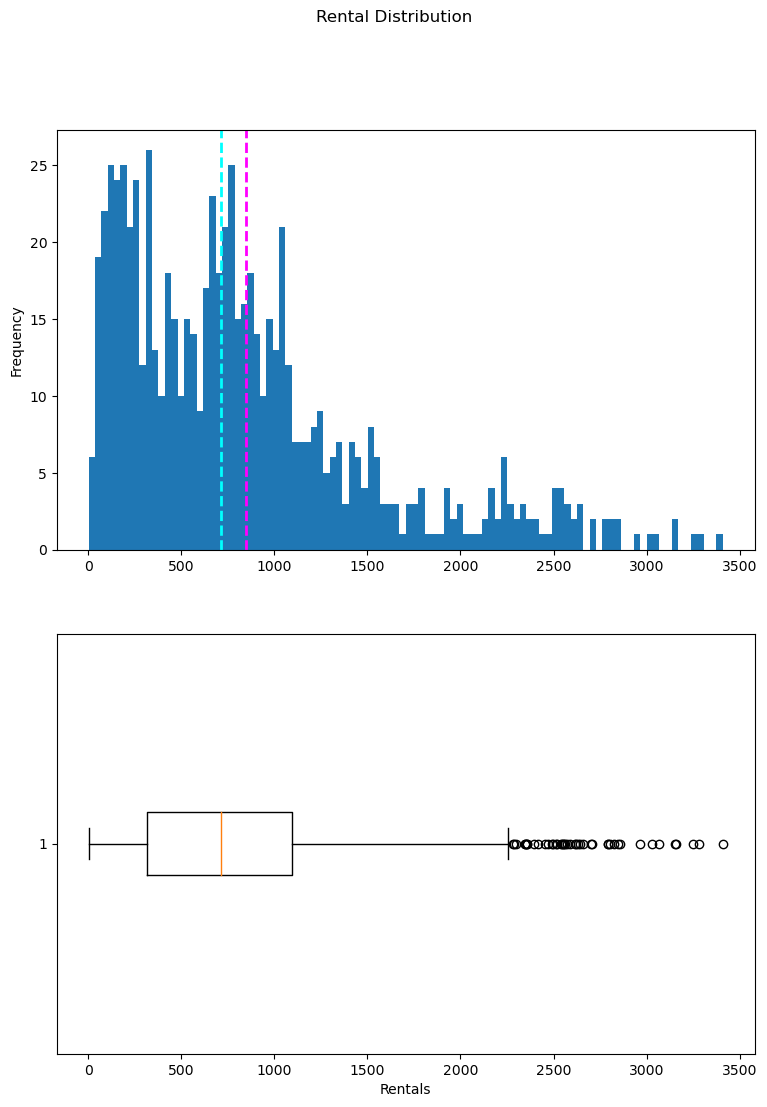

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = bike_data['rentals']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()


The plots show that the number of daily rentals ranges from 0 to just over 3,400. However, the mean (and median) number of daily rentals is closer to the low end of that range, with most of the data between 0 and around 2,200 rentals. The few values above this are shown in the box plot as small circles, indicating that they are outliers - in other words, unusually high or low values beyond the typical range of most of the data.

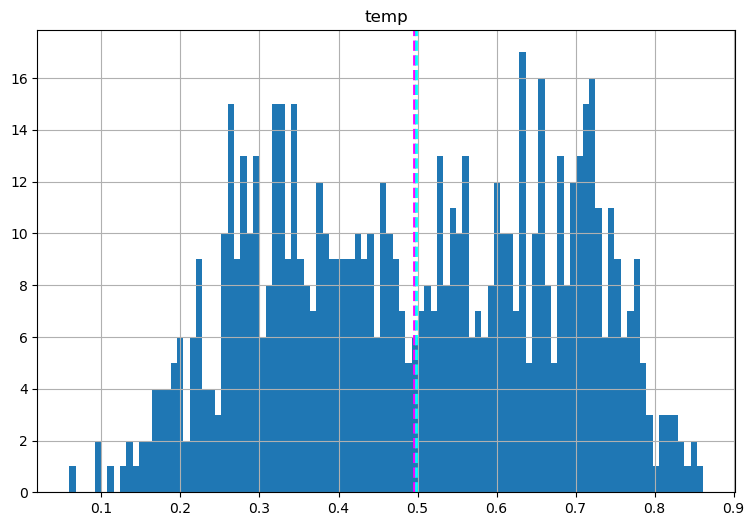

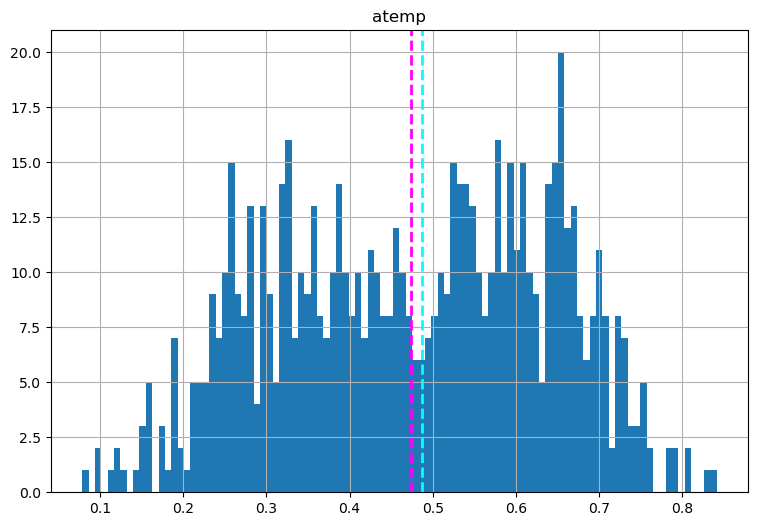

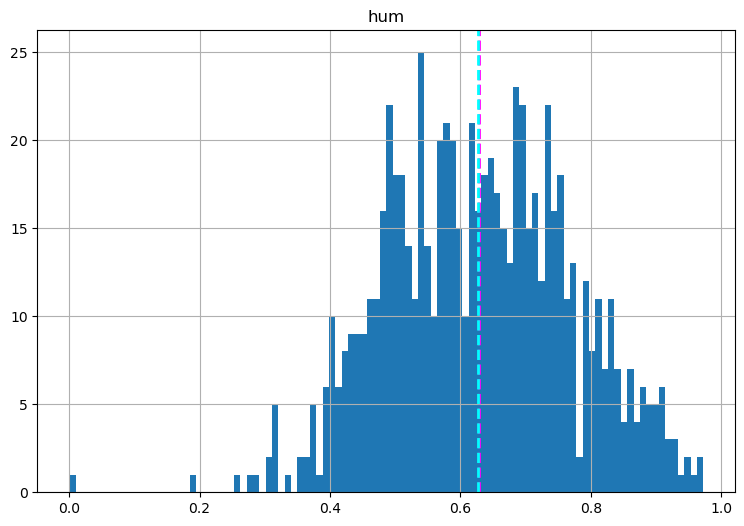

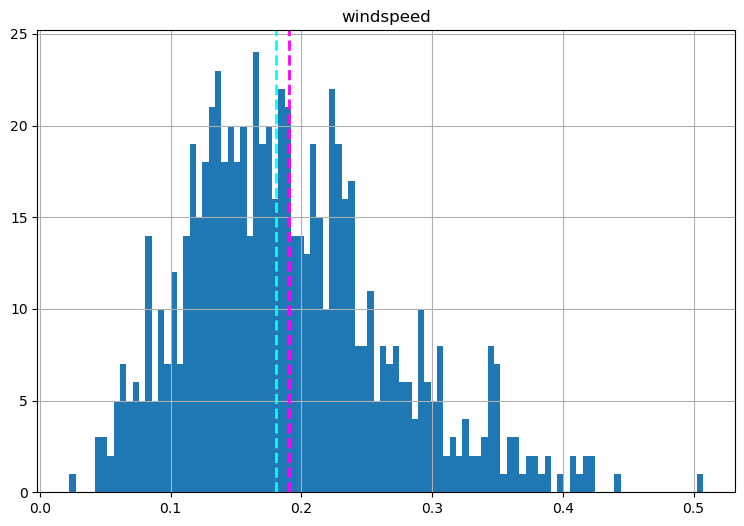

In [5]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

The numeric features seem to be more normally distributed, with the mean and median nearer the middle of the range of values, coinciding with where the most commonly occurring values are.

Note: The distributions are not truly normal in the statistical sense, which would result in a smooth, symmetric "bell-curve" histogram with the mean and mode (the most common value) in the center; but they do generally indicate that most of the observations have a value somewhere near the middle.

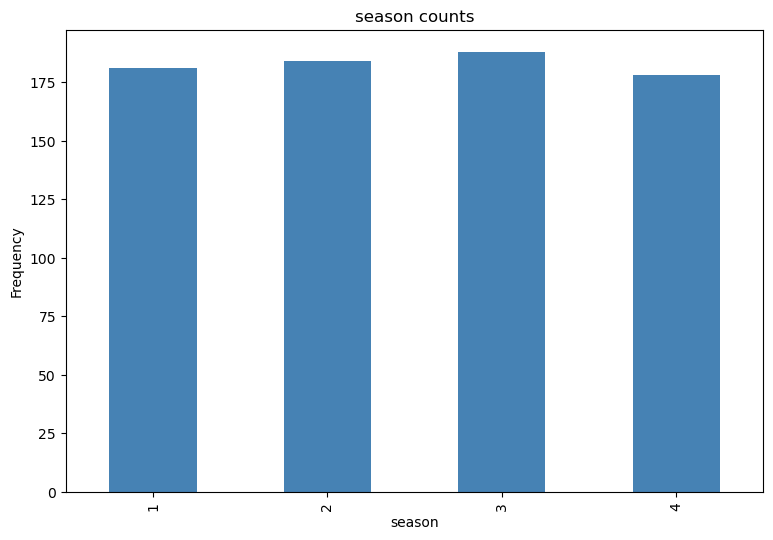

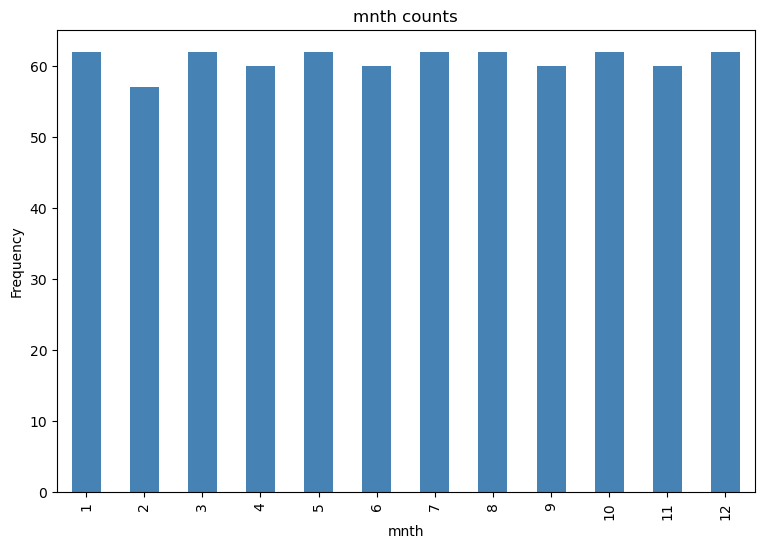

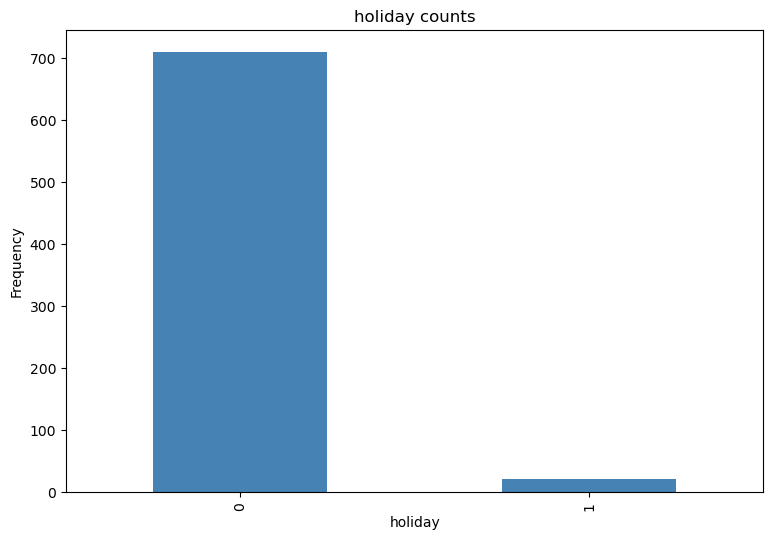

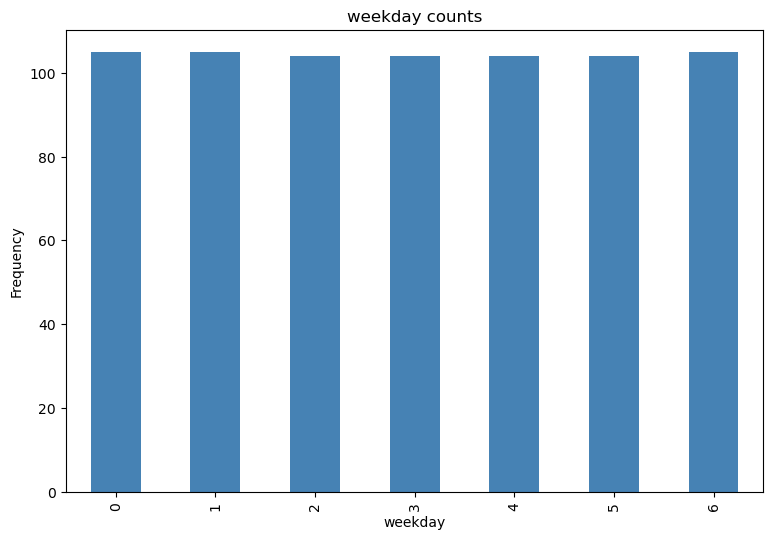

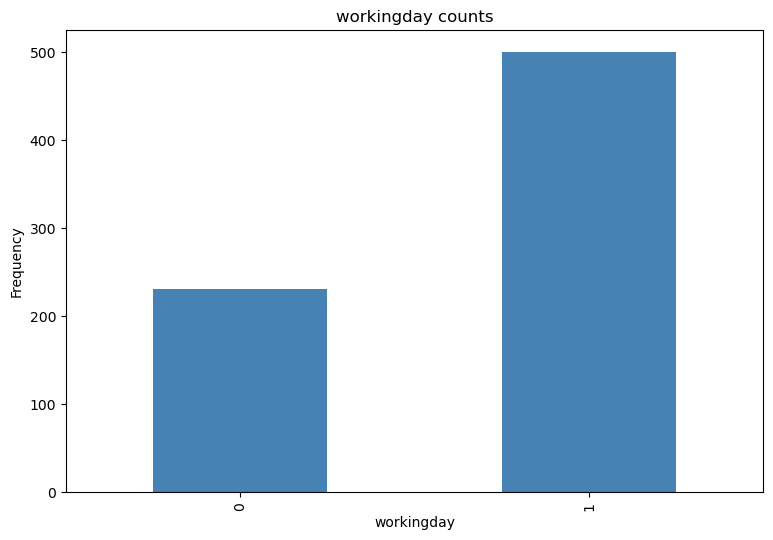

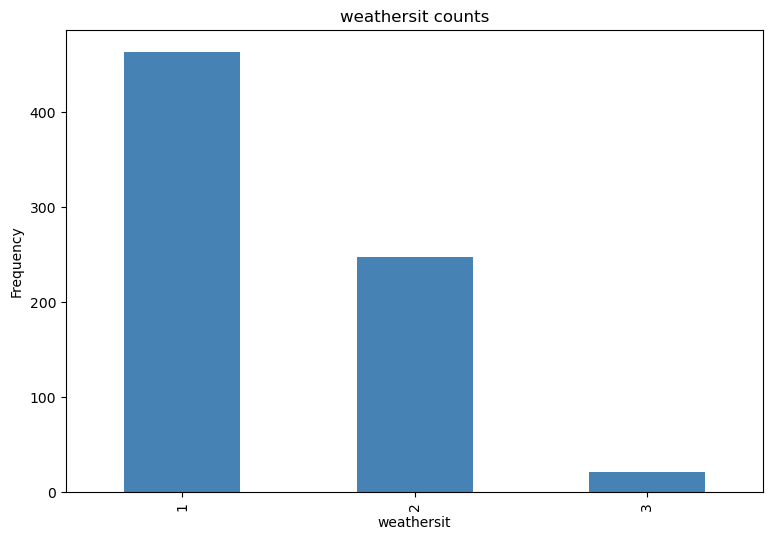

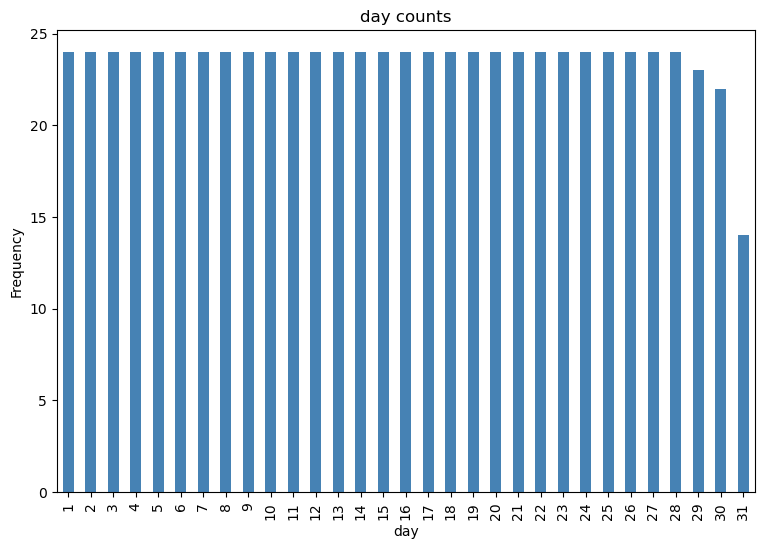

In [6]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


Many of the categorical features show a more or less uniform distribution (meaning there's roughly the same number of rows for each category). Exceptions to this include:

holiday: There are many fewer days that are holidays than days that aren't.
workingday: There are more working days than non-working days.
weathersit: Most days are category 1 (clear), with category 2 (mist and cloud) the next most common. There are comparatively few category 3 (light rain or snow) days, and no category 4 (heavy rain, hail, or fog) days at all.

To look for relationships between the features and the rentals label we want to be able to predict for the numeric features, we can create scatter plots that show the intersection of feature and label values. We can also calculate the correlation statistic to quantify the apparent relationship..

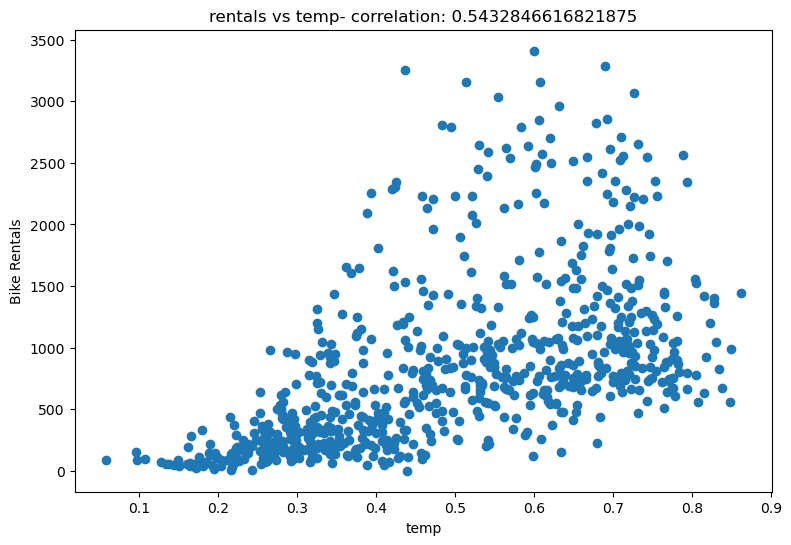

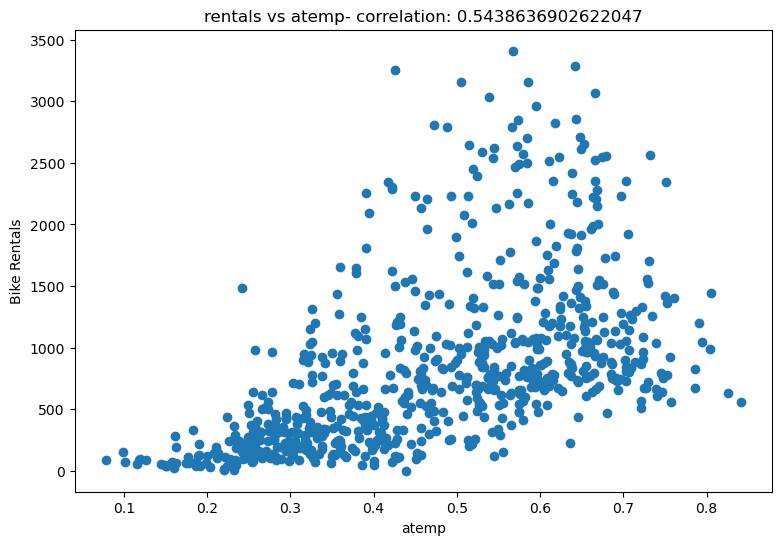

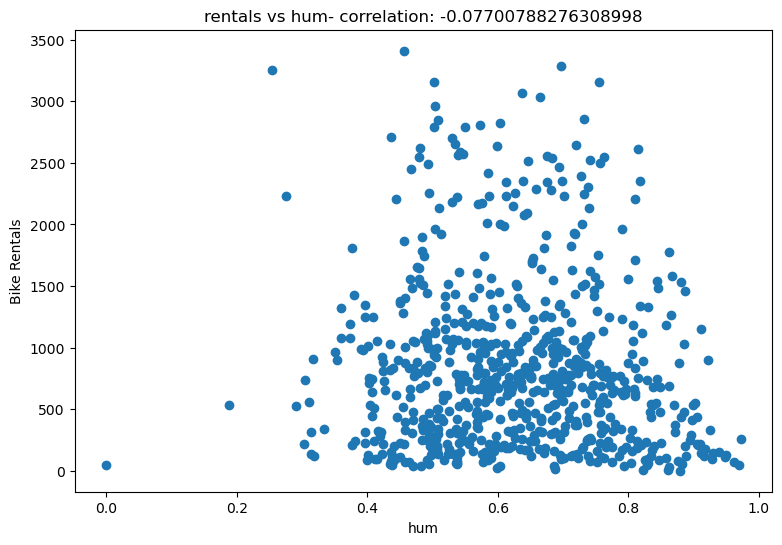

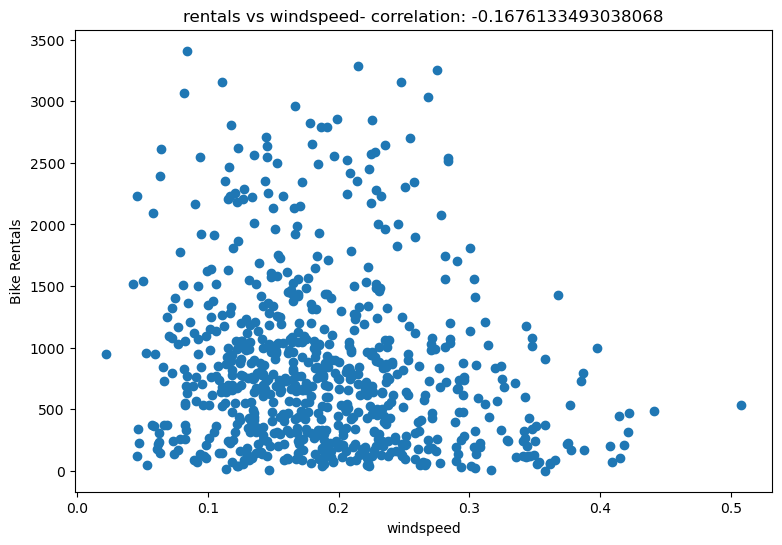

In [7]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()


The results aren't conclusive, but if you look closely at the scatter plots for temp and atemp, you can see a vague diagonal trend showing that higher rental counts tend to coincide with higher temperatures; and a correlation value of just over 0.5 for both of these features supports this observation. Conversely, the plots for hum and windspeed show a slightly negative correlation, indicating that there are fewer rentals on days with high humidity or windspeed.

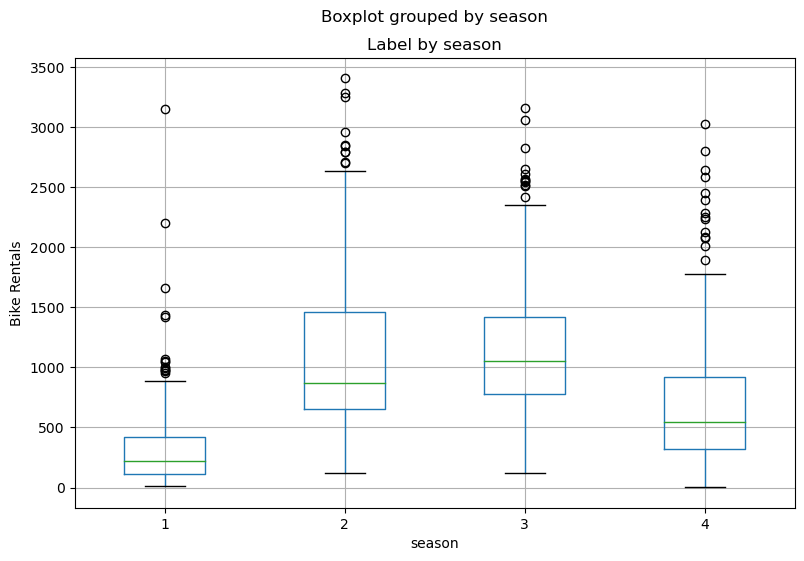

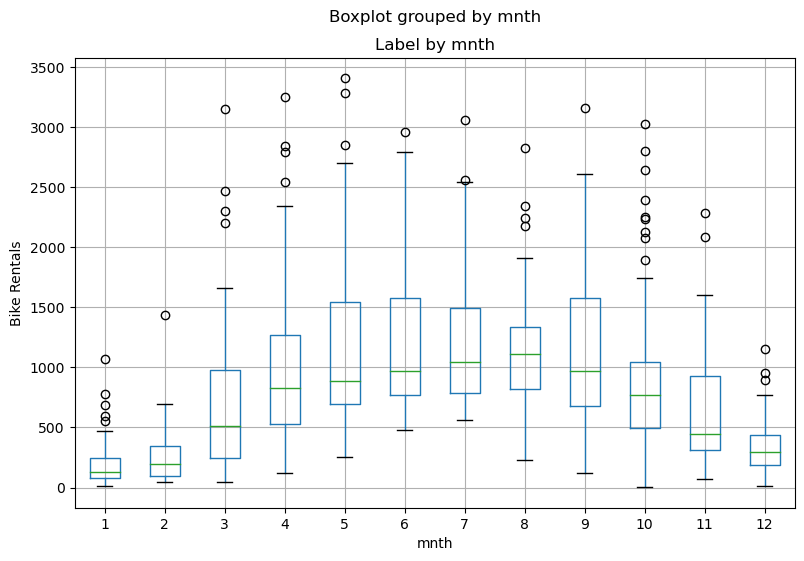

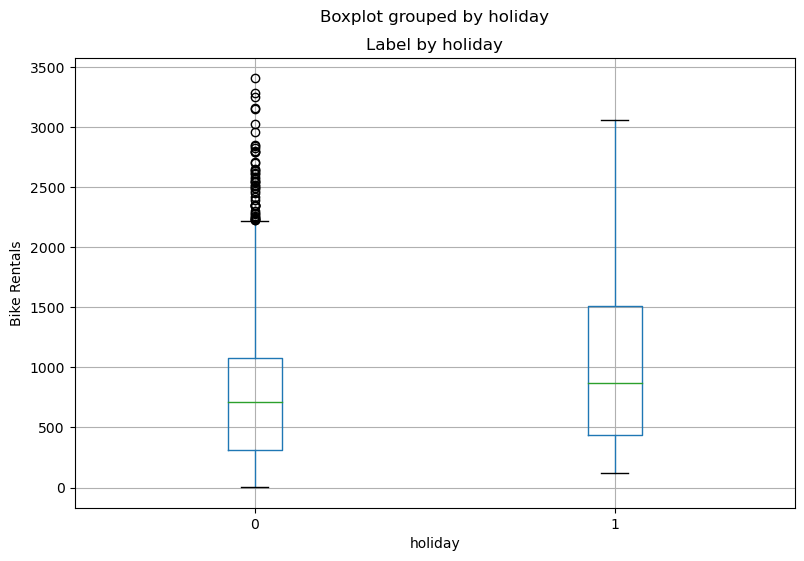

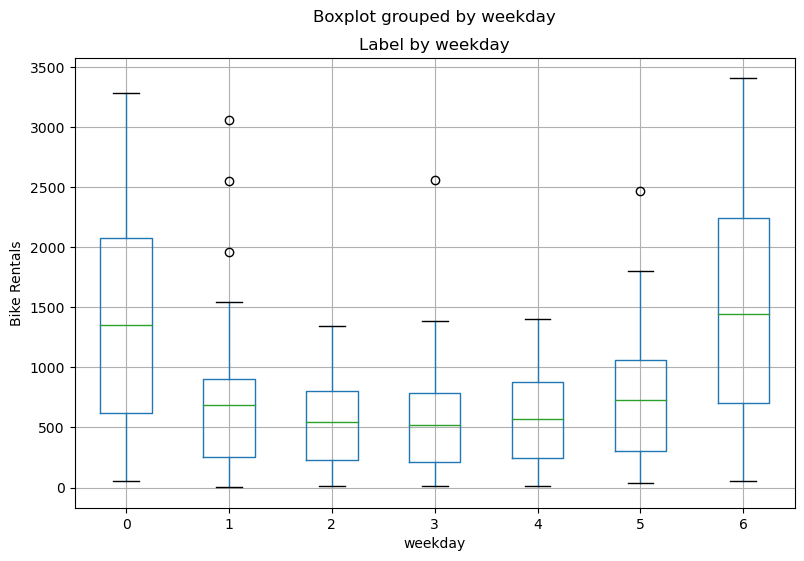

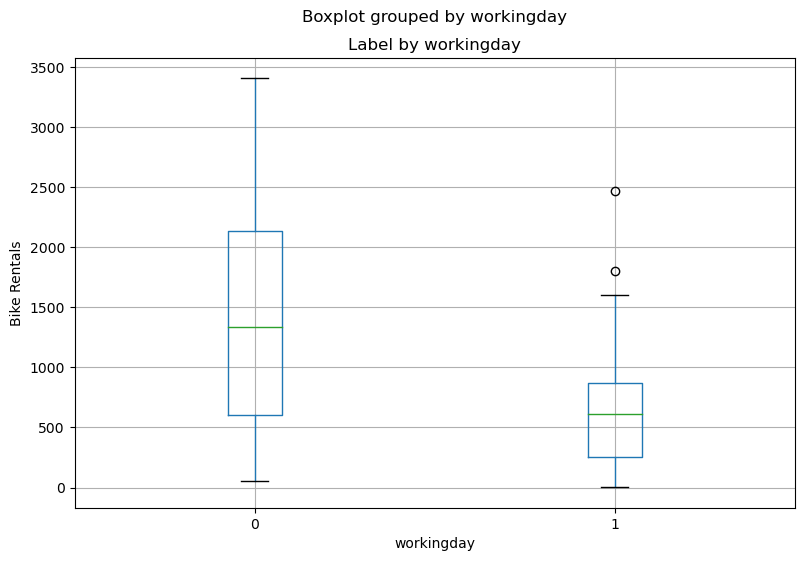

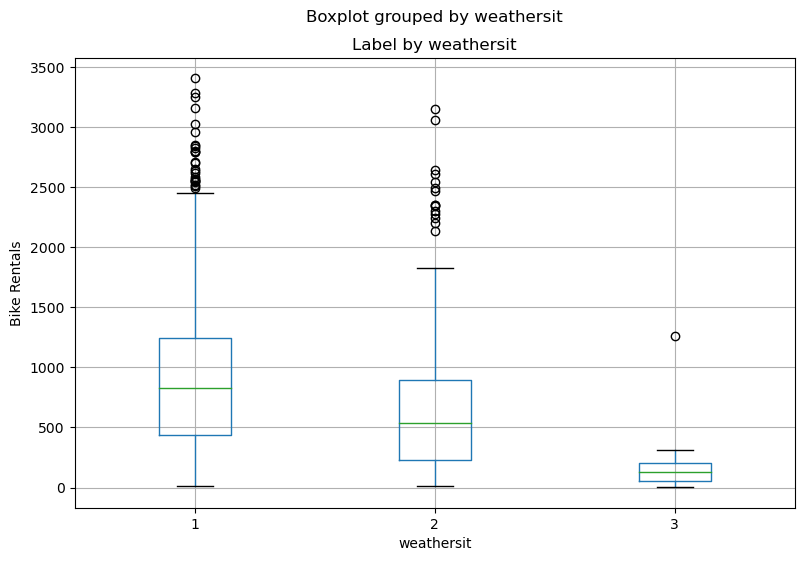

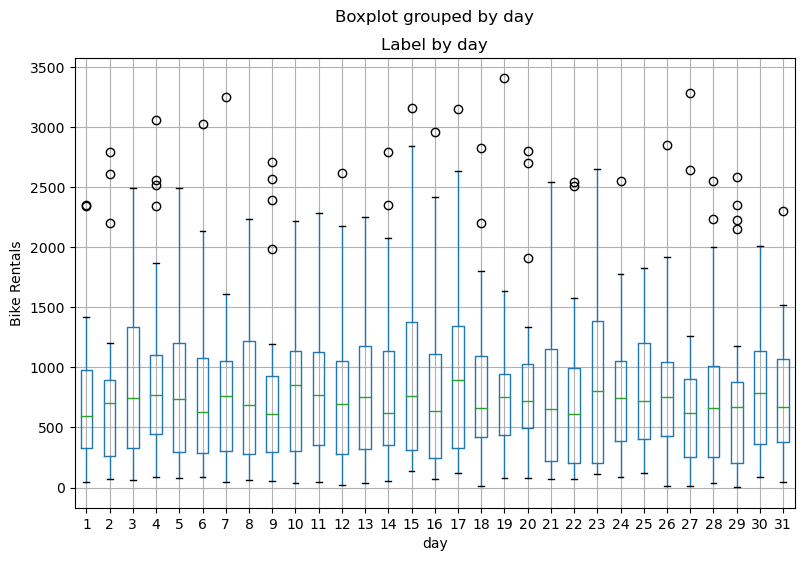

In [8]:
# plot a boxplot for the label by each categorical feature to compare the categorical features to the label
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

The plots show some variance in the relationship between some category values and rentals. For example, there's a clear difference in the distribution of rentals on weekends (weekday 0 or 6) and those during the working week (weekday 1 to 5). Similarly, there are notable differences for holiday and workingday categories. There's a noticeable trend that shows different rental distributions in spring and summer months compared to winter and fall months. The weathersit category also seems to make a difference in rental distribution. The day feature we created for the day of the month shows little variation, indicating that it's probably not predictive of the number of rentals.

Train a Regression Model
Now that we've explored the data, it's time to use it to train a regression model that uses the features we've identified as potentially predictive to predict the rentals label. The first thing we need to do is to separate the features we want to use to train the model from the label we want it to predict.

In [9]:
# Separate features and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

After separating the dataset, we now have numpy arrays named X containing the features, and y containing the labels.
We could train a model using all of the data; but it's common practice in supervised learning to split the data into two subsets; a (typically larger) set with which to train the model, and a smaller "hold-back" set with which to validate the trained model. This enables us to evaluate how well the model performs when used with the validation dataset by comparing the predicted labels to the known labels. It's important to split the data randomly (rather than say, taking the first 70% of the data for training and keeping the rest for validation). This helps ensure that the two subsets of data are statistically comparable (so we validate the model with data that has a similar statistical distribution to the data on which it was trained).

In [10]:
#To randomly split the data, we'll use the train_test_split function in the scikit-learn library.
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


Now we have the following four datasets:

X_train: The feature values we'll use to train the model
y_train: The corresponding labels we'll use to train the model
X_test: The feature values we'll use to validate the model
y_test: The corresponding labels we'll use to validate the model

Now we're ready to train a model by fitting a suitable regression algorithm to the training data. We'll use a linear regression algorithm, a common starting point for regression that works by trying to find a linear relationship between the X values and the y label. The resulting model is a function that conceptually defines a line where every possible X and y value combination intersect.

In Scikit-Learn, training algorithms are encapsulated in estimators, and in this case we'll use the LinearRegression estimator to train a linear regression model.

In [12]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


Evaluate the Trained Model
Now that we've trained the model, we can use it to predict rental counts for the features we held back in our validation dataset. Then we can compare these predictions to the actual label values to evaluate how well (or not!) the model is working.

In [13]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


Comparing each prediction with its corresponding "ground truth" actual value isn't a very efficient way to determine how well the model is predicting. Let's see if we can get a better indication by visualizing a scatter plot that compares the predictions to the actual labels. We'll also overlay a trend line to get a general sense for how well the predicted labels align with the true labels.

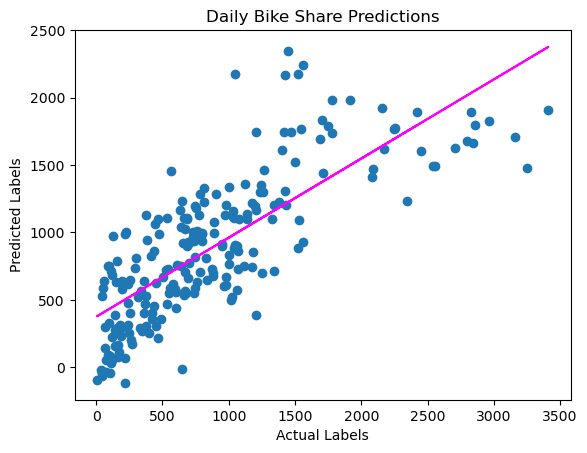

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

There's a definite diagonal trend, and the intersections of the predicted and actual values are generally following the path of the trend line; but there's a fair amount of difference between the ideal function represented by the line and the results. 
This variance represents the residuals of the model - in other words, the difference between the label predicted when the model applies the coefficients it learned during training to the validation data, and the actual value of the validation label. 
These residuals when evaluated from the validation data indicate the expected level of error when the model is used with new data for which the label is unknown.

You can quantify the residuals by calculating a number of commonly used evaluation metrics. We'll focus on the following three:

Mean Square Error (MSE): The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model

Root Mean Square Error (RMSE): The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)

Coefficient of Determination (usually known as R-squared or R2): A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.

In [15]:
#Let's use Scikit-Learn to calculate these metrics for our model, based on the predictions it generated for the validation data.
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035592
RMSE: 449.4135728595165
R2: 0.6040454736919191


So now we've quantified the ability of our model to predict the number of rentals. It definitely has some predictive power, but we can probably do better!

Experimenting with models
Regression models are often chosen because they work with small data samples, are robust, easy to interpret, and a variety exist.

Linear regression is the simplest form of regression, with no limit to the number of features used. Linear regression comes in many forms - often named by the number of features used and the shape of the curve that fits.

Decision trees take a step-by-step approach to predicting a variable. If we think of our bicycle example, the decision tree may be first split examples between ones that are during Spring/Summer and Autumn/Winter, make a prediction based on the day of the week. Spring/Summer-Monday may have a bike rental rate of 100 per day, while Autumn/Winter-Monday may have a rental rate of 20 per day.

Ensemble algorithms construct not just one decision tree, but a large number of trees - allowing better predictions on more complex data. Ensemble algorithms, such as Random Forest, are widely used in machine learning and science due to their strong prediction abilities.

In [16]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


--2022-11-21 11:47:15--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: 'daily-bike-share.csv.1'

     0K .......... .......... .......... .......... .......   100%  483K=0.1s

2022-11-21 11:47:16 (483 KB/s) - 'daily-bike-share.csv.1' saved [48800/48800]



   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


Now we have the following four datasets:

X_train: The feature values we'll use to train the model
y_train: The corresponding labels we'll use to train the model
X_test: The feature values we'll use to validate the model
y_test: The corresponding labels we'll use to validate the model

Experiment with Algorithms
The linear regression algorithm we used last time to train the model has some predictive capability, but there are many kinds of regression algorithm we could try, including:

Linear algorithms: Not just the Linear Regression algorithm we used above (which is technically an Ordinary Least Squares algorithm), but other variants such as Lasso and Ridge.
Tree-based algorithms: Algorithms that build a decision tree to reach a prediction.
Ensemble algorithms: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

Lasso() 

MSE: 201155.70593338402
RMSE: 448.5038527519959
R2: 0.605646863782449


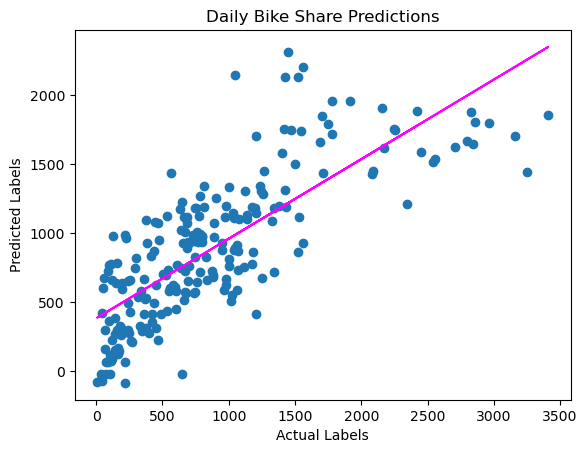

In [18]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Try a Decision Tree Algorithm
As an alternative to a linear model, there's a category of algorithms for machine learning that uses a tree-based approach in which the features in the dataset are examined in a series of evaluations, each of which results in a branch in a decision tree based on the feature value. At the end of each series of branches are leaf-nodes with the predicted label value based on the feature values.

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_3 <= 3.00
|   |   |   |   |   |   |--- feature_9 <= 0.22
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_9 >  0.22
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |--- feature_3 >  3.00
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |--- feature_8 <= 0.37
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |   |--- feature_8 >  0.37
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |   |--- feature_1 <= 7.00
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_1 >  7.00
|   |   |   |   |   |   |   |--- val

MSE: 268113.8409090909
RMSE: 517.7971039983623
R2: 0.4743796426990331


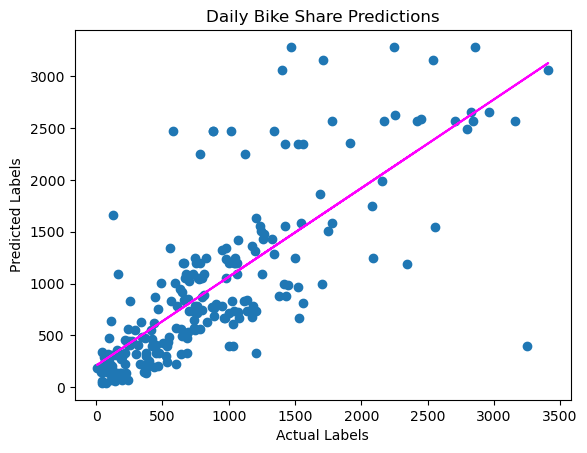

In [21]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

The tree-based model doesn't seem to have improved over the linear model, so what else could we try?

Try an Ensemble Algorithm
Ensemble algorithms work by combining multiple base estimators to produce an optimal model, either by applying an aggregate function to a collection of base models (sometimes referred to a bagging) or by building a sequence of models that build on one another to improve predictive performance (referred to as boosting).

For example, let's try a Random Forest model, which applies an averaging function to multiple Decision Tree models for a better overall model.

RandomForestRegressor() 

MSE: 112218.97486681816
RMSE: 334.991007143204
R2: 0.7800017430452424


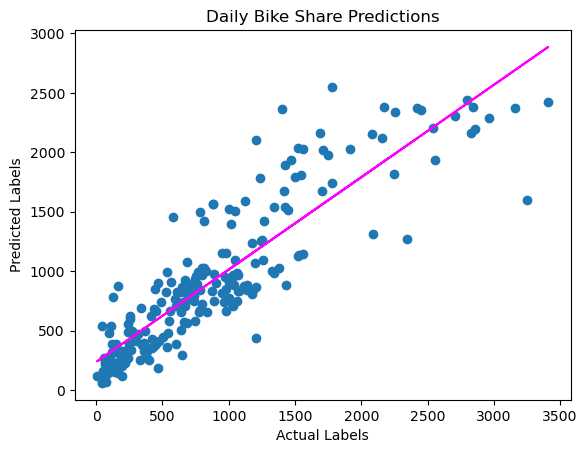

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

For good measure, let's also try a boosting ensemble algorithm. We'll use a Gradient Boosting estimator, which like a Random Forest algorithm builds multiple trees, but instead of building them all independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the loss (error) in the model.

GradientBoostingRegressor() 

MSE: 103957.66171791266
RMSE: 322.42466053004176
R2: 0.7961975289635652


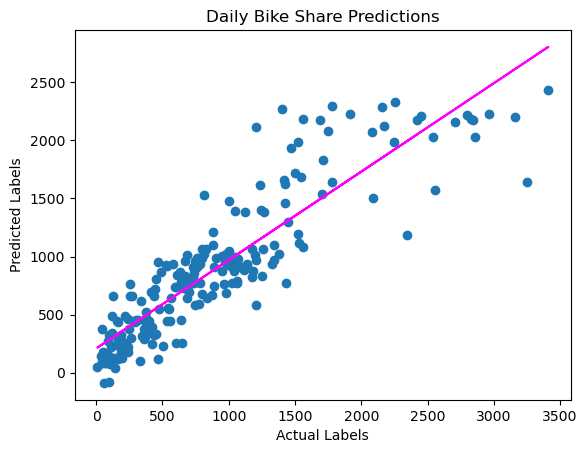

In [23]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Improve models with hyperparameters
Simple models with small datasets can often be fit in a single step, while larger datasets and more complex models must be fit by repeatedly using the model with training data and comparing the output with the expected label. If the prediction is accurate enough, we consider the model trained. If not, we adjust the model slightly and loop again.

Hyperparameters are values that change the way that the model is fit during these loops. Learning rate, for example, is a hyperparameter that sets how much a model is adjusted during each training cycle. A high learning rate means a model can be trained faster, but if it’s too high the adjustments can be so large that the model is never ‘finely tuned’ and not optimal.

Preprocessing data
Preprocessing refers to changes you make to your data before it is passed to the model. We have previously read that preprocessing can involve cleaning your dataset. While this is important, preprocessing can also include changing the format of your data, so it's easier for the model to use.
For example, data described as ‘red’, ‘orange’, ‘yellow’, ‘lime’, and ‘green’, may work better if converted into a format more native to computers, such as numbers stating the amount of red and the amount of green.

Scaling features
The most common preprocessing step is to scale features so they fall between zero and one. For example, the weight of a bike and the distance a person travels on a bike may be two very different numbers, but by scaling both numbers to between zero and one allows models to learn more effectively from the data.

Using categories as features
In machine learning, you can also use categorical features such as 'bicycle', 'skateboard’ or 'car'. These features are represented by 0 or 1 values in one-hot vectors - vectors that have a 0 or 1 for each possible value. For example, bicycle, skateboard, and car might respectively be (1,0,0), (0,1,0), and (0,0,1).

Regression - Optimize and save models
Let's start by loading the bicycle sharing data as a Pandas DataFrame and viewing the first few rows. As usual, we'll also split our data into training and test datasets.

In [24]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


--2022-11-21 13:44:23--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: 'daily-bike-share.csv.2'

     0K .......... .......... .......... .......... .......   100%  487K=0.1s

2022-11-21 13:44:24 (487 KB/s) - 'daily-bike-share.csv.2' saved [48800/48800]



   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


Now we have the following four datasets:

X_train: The feature values we'll use to train the model
y_train: The corresponding labels we'll use to train the model
X_test: The feature values we'll use to validate the model
y_test: The corresponding labels we'll use to validate the model

Now we're ready to train a model by fitting a boosting ensemble algorithm, as in our last notebook. Recall that a Gradient Boosting estimator, is like a Random Forest algorithm, but instead of building them all trees independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the loss (error) in the model.

GradientBoostingRegressor() 

MSE: 103796.2924548493
RMSE: 322.174319980425
R2: 0.7965138832756781


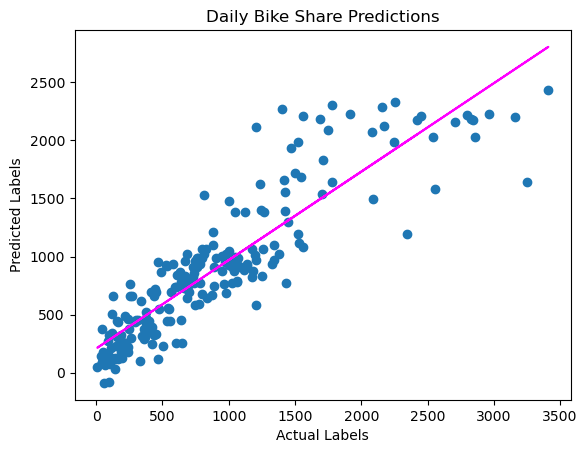

In [25]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Optimize Hyperparameters
Take a look at the GradientBoostingRegressor estimator definition in the output above, and note that it, like the other estimators we tried previously, includes a large number of parameters that control the way the model is trained. In machine learning, the term parameters refers to values that can be determined from data; values that you specify to affect the behavior of a training algorithm are more correctly referred to as hyperparameters.

The specific hyperparameters for an estimator vary based on the algorithm that the estimator encapsulates. In the case of the GradientBoostingRegressor estimator, the algorithm is an ensemble that combines multiple decision trees to create an overall predictive model. 
In many cases, the default values provided by Scikit-Learn will work well; but there may be some advantage in modifying hyperparameters to get better predictive performance or reduce training time.

So how do you know what hyperparameter values you should use? Well, in the absence of a deep understanding of how the underlying algorithm works, you'll need to experiment. Fortunately, SciKit-Learn provides a way to tune hyperparameters by trying multiple combinations and finding the best result for a given performance metric.

Let's try using a grid search approach to try combinations from a grid of possible values for the learning_rate and n_estimators hyperparameters of the GradientBoostingRegressor estimator.

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 

MSE: 108841.199490281
RMSE: 329.9108962891056
R2: 0.7866236596694567


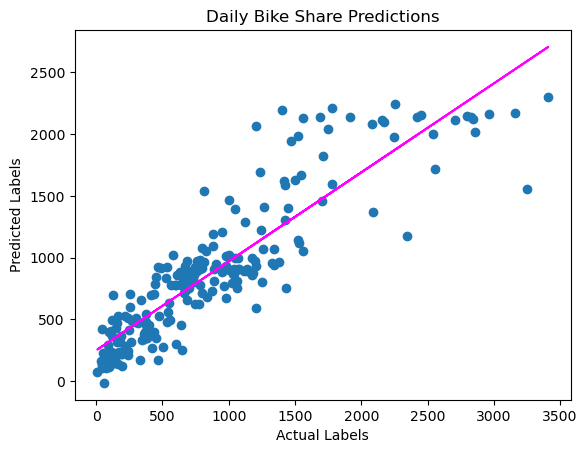

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Note: The use of random values in the Gradient Boosting algorithm results in slightly different metrics each time. In this case, the best model produced by hyperparameter tuning is unlikely to be significantly better than one trained with the default hyperparameter values; but it's still useful to know about the hyperparameter tuning technique!

Preprocess the Data
We trained a model with data that was loaded straight from a source file, with only moderately successful results.

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There's a huge range of preprocessing transformations you can perform to get your data ready for modeling, but we'll limit ourselves to a few common techniques:-

Scaling numeric features
Normalizing numeric features so they're on the same scale prevents features with large values from producing coefficients that disproportionately affect the predictions. For example, suppose your data includes the following numeric features: Assume each letter is a column(A-3 B-480 c-65)
Normalizing these features to the same scale may result in the following values (assuming A contains values from 0 to 10, B contains values from 0 to 1000, and C contains values from 0 to 100): A:0.3	B:0.48	C:0.65
There are multiple ways you can scale numeric data, such as calculating the minimum and maximum values for each column and assigning a proportional value between 0 and 1, or by using the mean and standard deviation of a normally distributed variable to maintain the same spread of values on a different scale.

Encoding categorical variables
Machine learning models work best with numeric features rather than text values, so you generally need to convert categorical features into numeric representations. For example, suppose your data includes the following categorical feature. Size: S M  L; You can apply ordinal encoding to substitute a unique integer value for each category, like this: Size: 0 1 2. Another common technique is to use one hot encoding to create individual binary (0 or 1) features for each possible category value. Size: S(100) M(010) L(001).

To apply these preprocessing transformations to the bike rental, we'll make use of a Scikit-Learn feature named pipelines. These enable us to define a set of preprocessing steps that end with an algorithm. You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).

In [27]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 105875.45932147182
RMSE: 325.3850938833428
R2: 0.7924378071297509


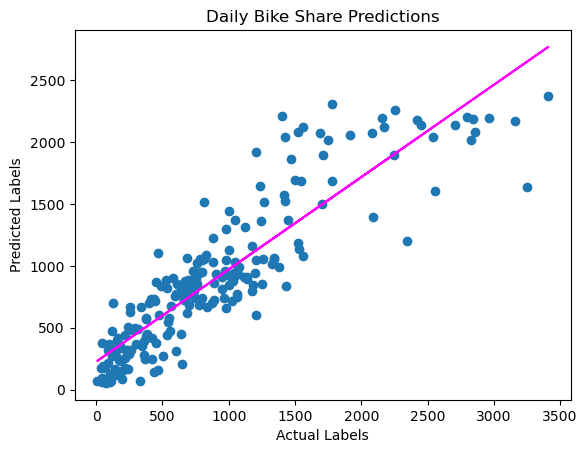

In [28]:
#The model is trained, including the preprocessing steps. Let's see how it performs with the validation data.
# # Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

The pipeline is composed of the transformations and the algorithm used to train the model. To try an alternative algorithm you can just change that step to a different kind of estimator.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 103619.49141590908
RMSE: 321.8998158059571
R2: 0.7968604906158432


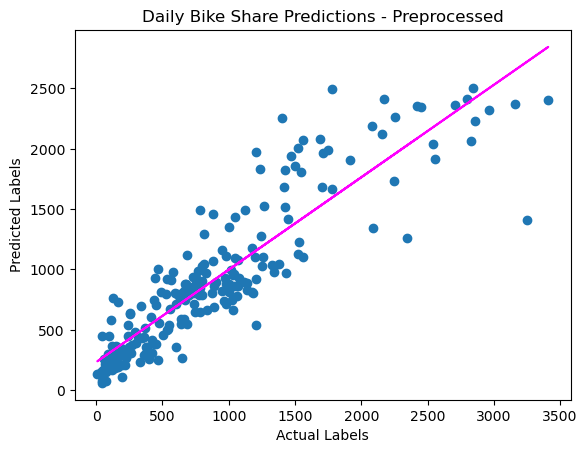

In [29]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Use the Trained Model
First, let's save the model.

In [30]:
import joblib

# Save the model as a pickle file
filename = './bike-share.pkl'
joblib.dump(model, filename)

['./bike-share.pkl']

Now, we can load it whenever we need it, and use it to predict labels for new data. This is often called scoring or inferencing.

In [31]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 98 rentals


The model's predict method accepts an array of observations, so you can use it to generate multiple predictions as a batch. For example, suppose you have a weather forecast for the next five days; you could use the model to predict bike rentals for each day based on the expected weather conditions.

In [32]:
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
616.0
789.0
245.0
198.0
277.0


Classification Models
Classification is a form of machine learning in which you train a model to predict which category an item belongs to. Categorical data has distinct 'classes', rather than numeric values. Some kinds of data can be either numeric or categorical: the time to run a race could be a time in seconds, or we could split times into classes of ‘fast’, ‘medium’ and ‘slow’ - categorical. 

Binary classification is classification with two categories. For example, we could label patients as non-diabetic or diabetic.

The class prediction is made by determining the probability for each possible class as a value between 0 -impossible - and 1 - certain. The total probability for all classes is 1, as the patient is definitely either diabetic or non-diabetic. So, if the predicted probability of a patient being diabetic is 0.3, then there is a corresponding probability of 0.7 that the patient is non-diabetic.

A threshold value, usually 0.5, is used to determine the predicted class - so if the positive class (in this case, diabetic) has a predicted probability greater than the threshold, then a classification of diabetic is predicted.

Classification is an example of a supervised machine learning technique, which means it relies on data that includes known feature values (for example, diagnostic measurements for patients) as well as known label values (for example, a classification of non-diabetic or diabetic). A classification algorithm is used to fit a subset of the data to a function that can calculate the probability for each class label from the feature values. The remaining data is used to evaluate the model by comparing the predictions it generates from the features to the known class labels.

Supervised machine learning techniques involve training a model to operate on a set of features and predict a label using a dataset that includes some already-known label values. You can think of this function like this, in which y represents the label we want to predict and X represents the vector of features the model uses to predict it.

Classification is a form of supervised machine learning in which you train a model to use the features (the x values in our function) to predict a label (y) that calculates the probability of the observed case belonging to each of a number of possible classes, and predicting an appropriate label. The simplest form of classification is binary classification, in which the label is 0 or 1, representing one of two classes; for example, "True" or "False"; "Internal" or "External"; "Profitable" or "Non-Profitable"; and so on.
Below is an exercise on Binary Classification:

In [1]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

--2022-11-23 13:37:20--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: 'diabetes.csv'

     0K .......... .......... .......... .......... ..........  6%  339K 2s
    50K .......... .......... .......... .......... .......... 13% 1.51M 1s
   100K .......... .......... .......... .......... .......... 19% 1.05M 1s
   150K .......... .......... .......... .......... .......... 26% 2.13M 1s
   200K .......... .......... .......... .......... .......... 32% 1.13M 1s
   250K .......... .......... .......... .......... .......... 39% 2.97M 0s
   300K .......... .......... .......... .......... .......... 

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


This data consists of diagnostic information about some patients who have been tested for diabetes. Scroll to the right if necessary, and note that the final column in the dataset (Diabetic) contains the value 0 for patients who tested negative for diabetes, and 1 for patients who tested positive. This is the label that we will train our model to predict; most of the other columns (Pregnancies,PlasmaGlucose,DiastolicBloodPressure, and so on) are the features we will use to predict the Diabetic label.

In [2]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
  Label: 0
Patient 2 
  Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
  Label: 0
Patient 3 
  Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
  Label: 0
Patient 4 
  Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
  Label: 1


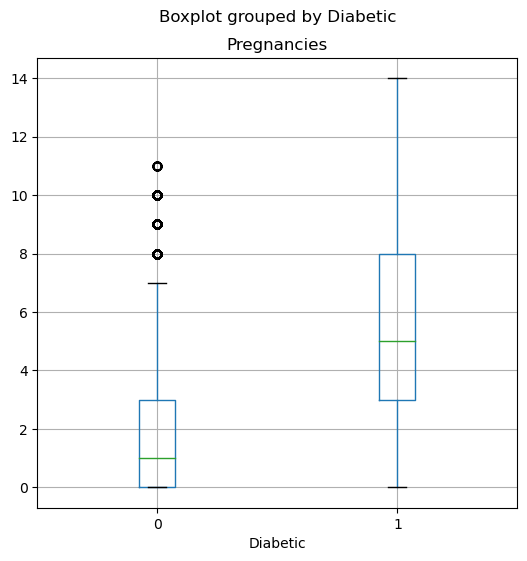

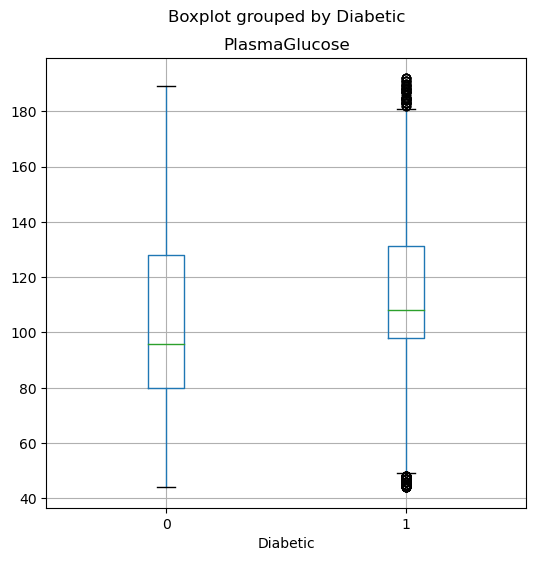

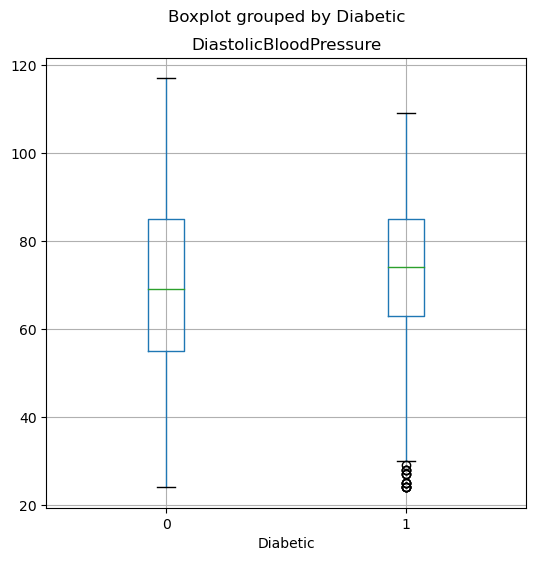

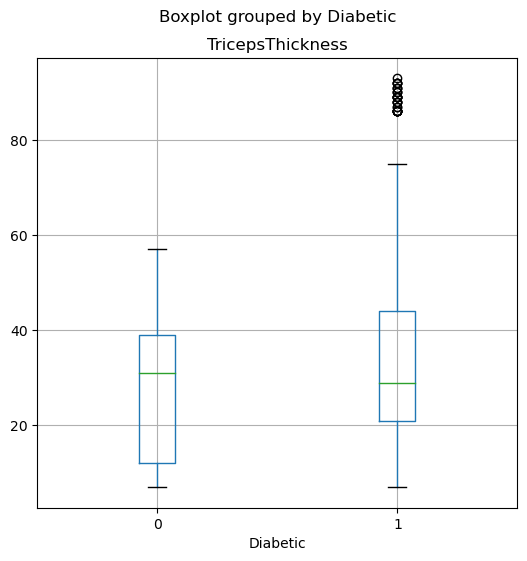

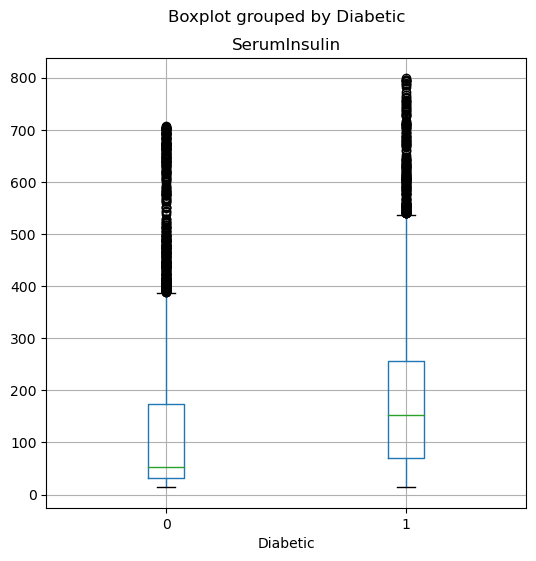

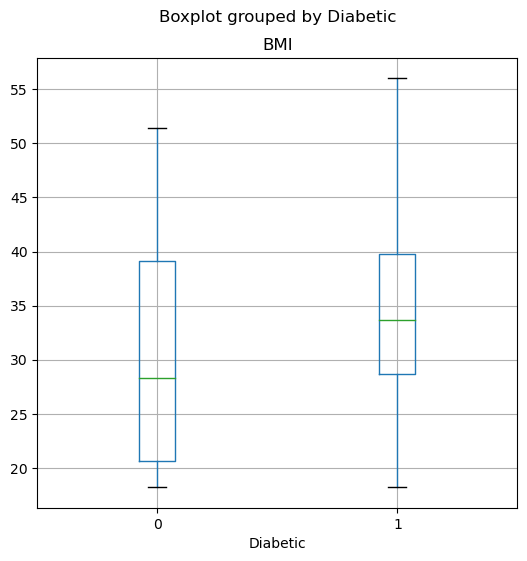

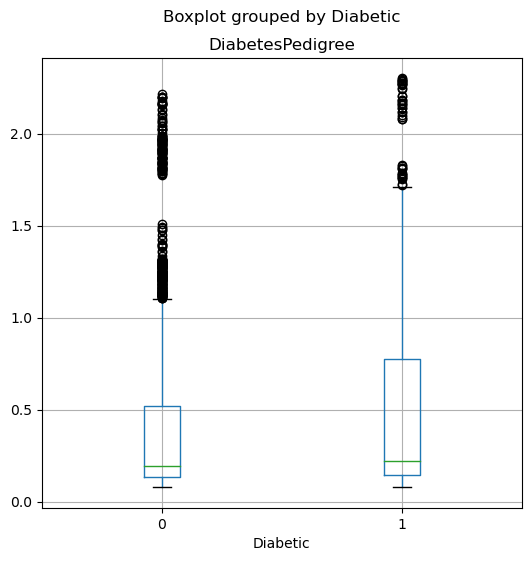

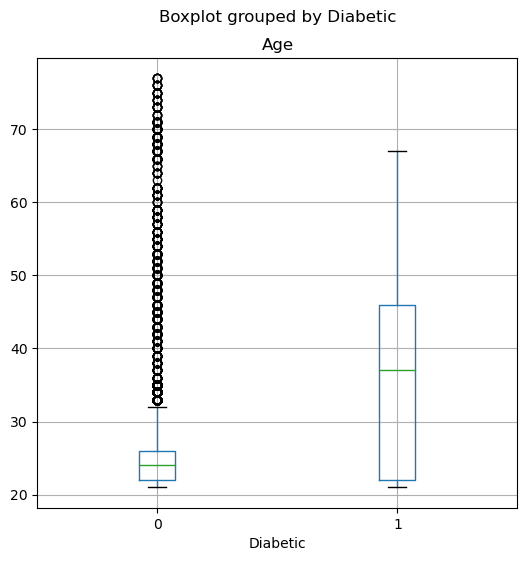

In [3]:
#compare feature distributions for each label value
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

For some of the features, there's a noticeable difference in the distribution for each label value. In particular, Pregnancies and Age show markedly different distributions for diabetic patients than for non-diabetic patients. These features may help predict whether or not a patient is diabetic.

Split the data
Our dataset includes known values for the label, so we can use this to train a classifier so that it finds a statistical relationship between the features and the label value; but how will we know if our model is any good? How do we know it will predict correctly when we use it with new data that it wasn't trained with? Well, we can take advantage of the fact we have a large dataset with known label values, use only some of it to train the model, and hold back some to test the trained model - enabling us to compare the predicted labels with the already known labels in the test set.

In Python, the scikit-learn package contains a large number of functions we can use to build a machine learning model - including a train_test_split function that ensures we get a statistically random split of training and test data. We'll use that to split the data into 70% for training and hold back 30% for testing.

In [4]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


Now we're ready to train our model by fitting the training features (X_train) to the training labels (y_train). There are various algorithms we can use to train the model. In this example, we'll use Logistic Regression, which is a well-established algorithm for classification. In addition to the training features and labels, we'll need to set a regularization parameter. This is used to counteract any bias in the sample, and help the model generalize well by avoiding overfitting the model to the training data.

In [5]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


Now we've trained the model using the training data, we can use the test data we held back to evaluate how well it predicts. Again, scikit-learn can help us do this. Let's start by using the model to predict labels for our test set, and compare the predicted labels to the known labels:

In [6]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


The arrays of labels are too long to be displayed in the notebook output, so we can only compare a few values. Using scikit-learn we can check the accuracy of the predictions - in simple terms, what proportion of the labels did the model predict correctly?

In [7]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7893333333333333


We prepared our data by splitting it into test and train datasets, and applied logistic regression - a way of applying binary labels to our data. Our model was able to predict whether patients had diabetes with what appears like reasonable accuracy.

In [8]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



The classification report includes the following metrics for each class (0 and 1)

Precision: Of the predictions the model made for this class, what proportion were correct?
Recall: Out of all of the instances of this class in the test dataset, how many did the model identify?
F1-Score: An average metric that takes both precision and recall into account.
Support: How many instances of this class are there in the test dataset?

It also includes averages for these metrics, including a weighted average that allows for the imbalance in the number of cases of each class.

Because this is a binary classification problem, the 1 class is considered positive and its precision and recall are particularly interesting - these in effect answer the questions:

Of all the patients the model predicted are diabetic, how many are actually diabetic?
Of all the patients that are actually diabetic, how many did the model identify?

In [9]:
# the precision_score and recall_score metrics in scikit-learn (which by default assume a binary classification model).
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7242472266244057
Overall Recall: 0.6036988110964333


The precision and recall metrics are derived from four possible prediction outcomes:

True Positives: The predicted label and the actual label are both 1.
False Positives: The predicted label is 1, but the actual label is 0.
False Negatives: The predicted label is 0, but the actual label is 1.
True Negatives: The predicted label and the actual label are both 0.

These metrics are generally tabulated for the test set and shown together as a confusion matrix, which takes the following form:
TN FP
FN TP
Note that the correct (true) predictions form a diagonal line from top left to bottom right - these figures should be significantly higher than the false predictions if the model is any good.

In [10]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2638  348]
 [ 600  914]]


Until now, we've considered the predictions from the model as being either 1 or 0 class labels. Actually, things are a little more complex than that. Statistical machine learning algorithms, like logistic regression, are based on probability; so what actually gets predicted by a binary classifier is the probability that the label is true (P(y)) and the probability that the label is false (1 - P(y)). A threshold value of 0.5 is used to decide whether the predicted label is a 1 (P(y) > 0.5) or a 0 (P(y) <= 0.5). You can use the predict_proba method to see the probability pairs for each case:

In [11]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.81657116 0.18342884]
 [0.9630332  0.0369668 ]
 [0.80872619 0.19127381]
 ...
 [0.60692458 0.39307542]
 [0.10656641 0.89343359]
 [0.63859127 0.36140873]]


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart, like this:

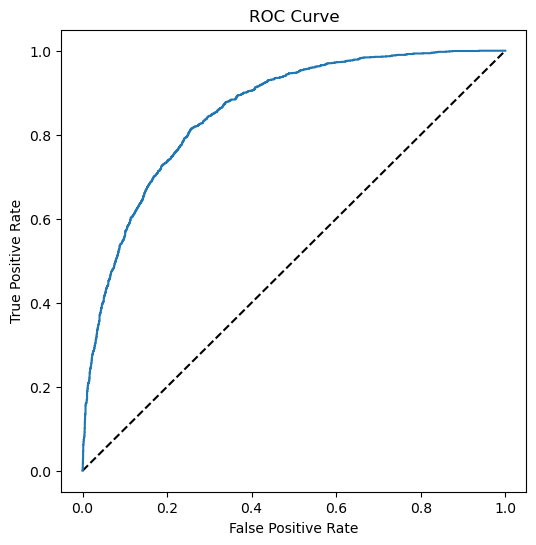

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric.

In [14]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8568444904932839


In this case, the ROC curve and its AUC indicate that the model performs better than a random guess which is not bad considering we performed very little preprocessing of the data.

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There's a huge range of preprocessing transformations you can perform to get your data ready for modeling, but we'll limit ourselves to a few common techniques:

Scaling numeric features so they're on the same scale. This prevents features with large values from producing coefficients that disproportionately affect the predictions.
Encoding categorical variables. For example, by using a one hot encoding technique you can create individual binary (true/false) features for each possible category value.

To apply these preprocessing transformations, we'll make use of a Scikit-Learn feature named pipelines. These enable us to define a set of preprocessing steps that end with an algorithm. You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).

In [15]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


The pipeline encapsulates the preprocessing steps as well as model training.

Let's use the model trained by this pipeline to predict labels for our test set, and compare the performance metrics with the basic model we created previously.

Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202440539337694


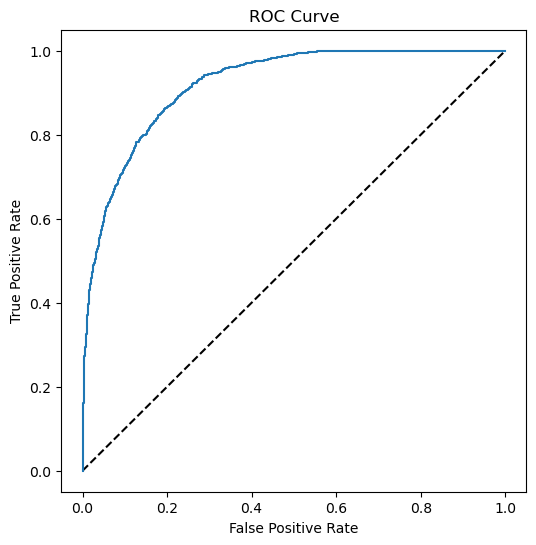

In [16]:
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



The results look a little better, so clearly preprocessing the data has made a difference.

Now let's try a different algorithm. Previously we used a logistic regression algorithm, which is a linear algorithm. There are many kinds of classification algorithm we could try, including:

Support Vector Machine algorithms: Algorithms that define a hyperplane that separates classes.
Tree-based algorithms: Algorithms that build a decision tree to reach a prediction
Ensemble algorithms: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.
This time, We'll use the same preprocessing steps as before, but we'll train the model using an ensemble algorithm named Random Forest that combines the outputs of multiple random decision trees

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Confusion Matrix:
 [[2862  124]
 [ 174 1340]] 

Accuracy: 0.9337777777777778
Overall Precision: 0.9153005464480874
Overall Recall: 0.8850726552179656

AUC: 0.9825857303258447


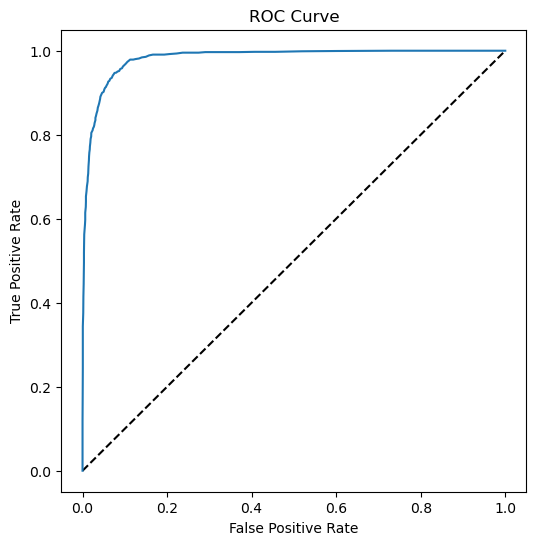

In [18]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

This is a much better prediction.

Use the Model for Inferencing
Now that we have a reasonably useful trained model, we can save it for use later to predict labels for new data:

In [19]:
import joblib

# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename)

['./diabetes_model.pkl']

In [20]:
# When we have some new observations for which the label is unknown, we can load the model and use it to predict values for the unknown label as follows
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1


The training accuracy of a classification model is much less important than how well that model will work when given new, unseen data. After all, we train models so that they can be used on new data we find in the real world. So, after we have trained a classification model, we should evaluate how it performs on a set of new, unseen data.

Simply calculating how many predictions were correct is sometimes misleading or too simplistic for us to understand the kinds of errors it will make in the real world. To get more detailed information, we can tabulate the results in a structure called a confusion matrix:
:       Predicted
Actual  0 1
:     0 2 1
:     1 1 2

The confusion matrix shows the total number of cases where:

The model predicted 0 and the actual label is 0 (true negatives; top left)
The model predicted 1 and the actual label is 1 (true positives; bottom right)
The model predicted 0 and the actual label is 1 (false negatives; bottom left)
The model predicted 1 and the actual label is 0 (false positives; top right)


From these core values, you can calculate a range of other metrics that can help you evaluate the performance of the model. For example:

Accuracy: (TP+TN)/(TP+TN+FP+FN) - out all of the predictions, how many were correct?
Recall: TP/(TP+FN) - of all the cases that are positive, how many did the model identify?
Precision: TP/(TP+FP) - of all the cases that the model predicted to be positive, how many actually are positive?

Alternative metrics for binary classifiers

Accuracy seems like a sensible metric to evaluate (and to a certain extent it is), but you need to be careful about drawing too many conclusions from the accuracy of a classifier. Remember that it's simply a measure of how many cases were predicted correctly. Suppose only 3% of the population is diabetic. You could create a classifier that always just predicts 0, and it would be 97% accurate - but not terribly helpful in identifying patients with diabetes!

Fortunately, there are some other metrics that reveal a little more about how our model is performing. Scikit-Learn includes the ability to create a classification report that provides more insight than raw accuracy alone.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')

# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values


# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)


print('Accuracy: ', accuracy_score(y_test, predictions))


--2022-11-24 10:52:00--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: 'diabetes.csv.1'

     0K .......... .......... .......... .......... ..........  6%  570K 1s
    50K .......... .......... .......... .......... .......... 13% 1.94M 1s
   100K .......... .......... .......... .......... .......... 19%  965K 1s
   150K .......... .......... .......... .......... .......... 26% 2.51M 1s
   200K .......... .......... .......... .......... .......... 32% 1.13M 0s
   250K .......... .......... .......... .......... .......... 39% 1.18M 0s
   300K .......... .......... .......... .......... .........

Training cases: 10500
Test cases: 4500
Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]
Accuracy:  0.7893333333333333


One of the simplest places to start is a classification report. Run the next cell to see a range of alternatives ways to assess our model.

In [2]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



The classification report includes the following metrics for each class (0 and 1)

Precision: Of the predictions the model made for this class, what proportion were correct?
Recall: Out of all of the instances of this class in the test dataset, how many did the model identify?
F1-Score: An average metric that takes both precision and recall into account.
Support: How many instances of this class are there in the test dataset?

The classification report also includes averages for these metrics, including a weighted average that allows for the imbalance in the number of cases of each class.

Because this is a binary classification problem, the 1 class is considered positive and its precision and recall are particularly interesting - these in effect answer the questions:

Of all the patients the model predicted are diabetic, how many are actually diabetic?
Of all the patients that are actually diabetic, how many did the model identify?
You can retrieve these values on their own by using the precision_score and recall_score metrics in scikit-learn (which by default assume a binary classification model).

In [3]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7242472266244057
Overall Recall: 0.6036988110964333


The precision and recall metrics are derived from four possible prediction outcomes:

True Positives: The predicted label and the actual label are both 1.
False Positives: The predicted label is 1, but the actual label is 0.
False Negatives: The predicted label is 0, but the actual label is 1.
True Negatives: The predicted label and the actual label are both 0.

In [4]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2638  348]
 [ 600  914]]


Until now, we've considered the predictions from the model as being either 1 or 0 class labels. Actually, things are a little more complex than that. Statistical machine learning algorithms, like logistic regression, are based on probability; so what actually gets predicted by a binary classifier is the probability that the label is true (P(y)) and the probability that the label is false (1 - P(y)). A threshold value of 0.5 is used to decide whether the predicted label is a 1 (P(y) > 0.5) or a 0 (P(y) <= 0.5). You can use the predict_proba method to see the probability pairs for each case:

In [5]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.81657116 0.18342884]
 [0.9630332  0.0369668 ]
 [0.80872619 0.19127381]
 ...
 [0.60692458 0.39307542]
 [0.10656641 0.89343359]
 [0.63859127 0.36140873]]


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart, like this:

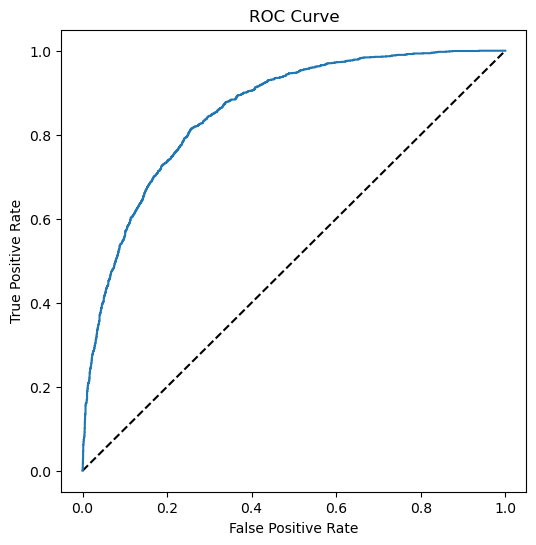

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric.

In [7]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8568444904932839


Perform preprocessing in a pipeline
In this case, the ROC curve and its AUC indicate that the model performs better than a random guess which is not bad considering we performed very little preprocessing of the data.

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There's a huge range of preprocessing transformations you can perform to get your data ready for modeling, but we'll limit ourselves to a few common techniques:

Scaling numeric features so they're on the same scale. This prevents features with large values from producing coefficients that disproportionately affect the predictions.
Encoding categorical variables. For example, by using a one hot encoding technique you can create individual binary (true/false) features for each possible category value.

To apply these preprocessing transformations, we'll make use of a Scikit-Learn feature named pipelines. These enable us to define a set of preprocessing steps that end with an algorithm. You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).

In [8]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


The pipeline encapsulates the preprocessing steps as well as model training.

Let's use the model trained by this pipeline to predict labels for our test set, and compare the performance metrics with the basic model we created previously.

Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202440539337694


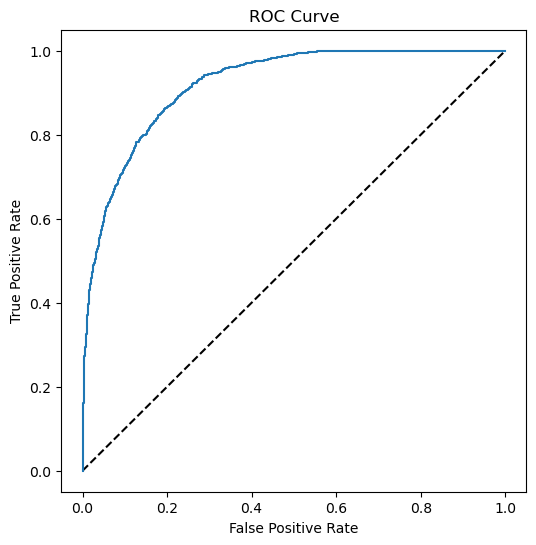

In [9]:
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



The results look a little better, so clearly preprocessing the data has made a difference.

Try a different algorithm
Now let's try a different algorithm. Previously we used a logistic regression algorithm, which is a linear algorithm. There are many kinds of classification algorithm we could try, including:

Support Vector Machine algorithms: Algorithms that define a hyperplane that separates classes.
Tree-based algorithms: Algorithms that build a decision tree to reach a prediction
Ensemble algorithms: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.
This time, We'll use the same preprocessing steps as before, but we'll train the model using an ensemble algorithm named Random Forest that combines the outputs of multiple random decision trees.

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Confusion Matrix:
 [[2851  135]
 [ 186 1328]] 

Accuracy: 0.9286666666666666
Overall Precision: 0.9077238550922762
Overall Recall: 0.8771466314398944

AUC: 0.9820352751413244


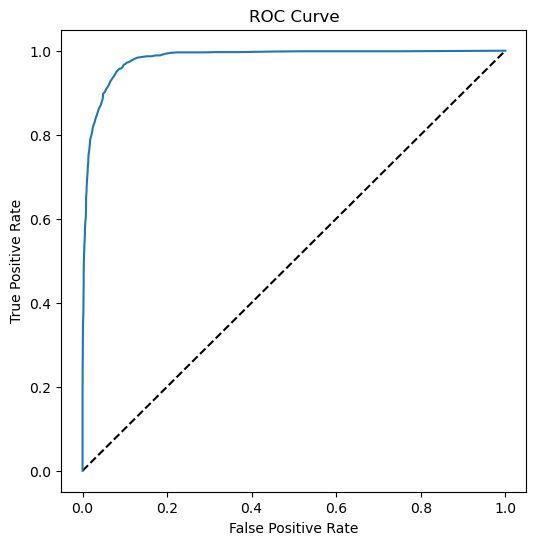

In [11]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Use the Model for Inferencing
Now that we have a reasonably useful trained model, we can save it for use later to predict labels for new data:

In [12]:
import joblib

# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename)

['./diabetes_model.pkl']

In [13]:
# when we have new data load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1


Create multiclass classification models
It's also possible to create multiclass classification models, in which there are more than two possible classes. For example, the health clinic might expand the diabetes model to classify patients as: Non-diabetic, Type-1 diabetic, Type-2 diabetic.The individual class probability values would still add up to a total of 1 as the patient is definitely in only one of the three classes, and the most probable class would be predicted by the model

Using Multiclass classification models
Multiclass classification can be thought of as a combination of multiple binary classifiers. There are two ways in which you approach the problem:

One vs Rest (OVR), in which a classifier is created for each possible class value, with a positive outcome for cases where the prediction is this class, and negative predictions for cases where the prediction is any other class. For example, a classification problem with four possible shape classes (square, circle, triangle, hexagon) would require four classifiers that predict: square or not, circle or not, triangle or not, hexagon or not

One vs One (OVO), in which a classifier for each possible pair of classes is created. The classification problem with four shape classes would require the following binary classifiers: square or circle, square or triangle, square or hexagon, circle or triangle, circle or hexagon, triangle or hexagon.

In both approaches, the overall model must take into account all of these predictions to determine which single category the item belongs to.
The overall model that combines the classifiers generates a vector of predictions in which the probabilities generated from the individual binary classifiers are used to determine which class to predict.

Fortunately, in most machine learning frameworks, including scikit-learn, implementing a multiclass classification model is not significantly more complex than binary classification - and in most cases, the estimators used for binary classification implicitly support multiclass classification by abstracting an OVR algorithm, an OVO algorithm, or by allowing a choice of either.

Explore the data
Let's start by examining a dataset that contains observations of multiple classes. We'll use a dataset that contains observations of three different species of penguin.

Explore the data
Let's start by examining a dataset that contains observations of multiple classes. We'll use a dataset that contains observations of three different species of penguin.

In [14]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
penguins = pd.read_csv('penguins.csv')

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

--2022-11-24 11:58:04--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7086 (6.9K) [text/plain]
Saving to: 'penguins.csv'

     0K ......                                                100%  267K=0.03s

2022-11-24 11:58:05 (267 KB/s) - 'penguins.csv' saved [7086/7086]



,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
311,47.5,16.8,199.0,3900.0,2
243,52.2,17.1,228.0,5400.0,1
10,37.8,17.1,186.0,3300.0,0
148,36.0,17.8,195.0,3450.0,0
52,35.0,17.9,190.0,3450.0,0
301,52.0,19.0,197.0,4150.0,2
123,41.4,18.5,202.0,3875.0,0
80,34.6,17.2,189.0,3200.0,0
328,45.7,17.3,193.0,3600.0,2
156,47.6,14.5,215.0,5400.0,1


The dataset contains the following columns:

CulmenLength: The length in mm of the penguin's culmen (bill).
CulmenDepth: The depth in mm of the penguin's culmen.
FlipperLength: The length in mm of the penguin's flipper.
BodyMass: The body mass of the penguin in grams.
Species: An integer value that represents the species of the penguin.

The Species column is the label we want to train a model to predict. The dataset includes three possible species, which are encoded as 0, 1, and 2. The actual species names are revealed by the code below:

In [15]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2], row[3], int(row[4]),']',penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 49.8 17.3 198.0 3675.0 2 ] Chinstrap
[ 36.7 18.8 187.0 3800.0 0 ] Adelie
[ 42.5 16.7 187.0 3350.0 2 ] Chinstrap
[ 42.0 13.5 210.0 4150.0 1 ] Gentoo
[ 52.0 20.7 210.0 4800.0 2 ] Chinstrap
[ 50.0 15.2 218.0 5700.0 1 ] Gentoo
[ 36.7 19.3 193.0 3450.0 0 ] Adelie
[ 52.0 18.1 201.0 4050.0 2 ] Chinstrap
[ 55.1 16.0 230.0 5850.0 1 ] Gentoo
[ 37.8 20.0 190.0 4250.0 0 ] Adelie


Now that we know what the features and labels in the data represent, let's explore the dataset. 
First, let's see if there are any missing (null) values.

In [16]:
# Count the number of null values for each column
penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

It looks like there are some missing feature values, but no missing labels. Let's dig a little deeper and see the rows that contain nulls.

In [17]:
# Show rows containing nulls
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


There are two rows that contain no feature values at all (NaN stands for "not a number"), so these won't be useful in training a model. Let's discard them from the dataset.

In [18]:
# Drop rows containing NaN values
penguins=penguins.dropna()
#Confirm there are now no nulls
penguins.isnull().sum()


CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

Now that we've dealt with the missing values, let's explore how the features relate to the label by creating some box charts.

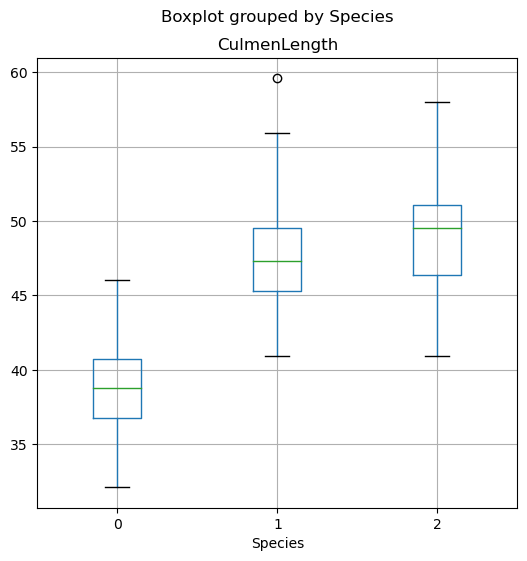

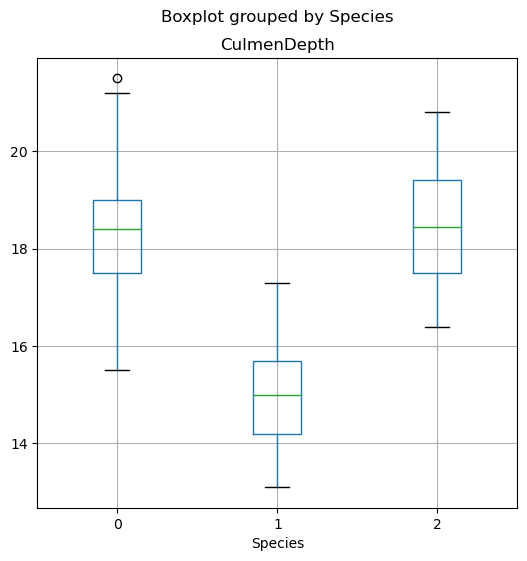

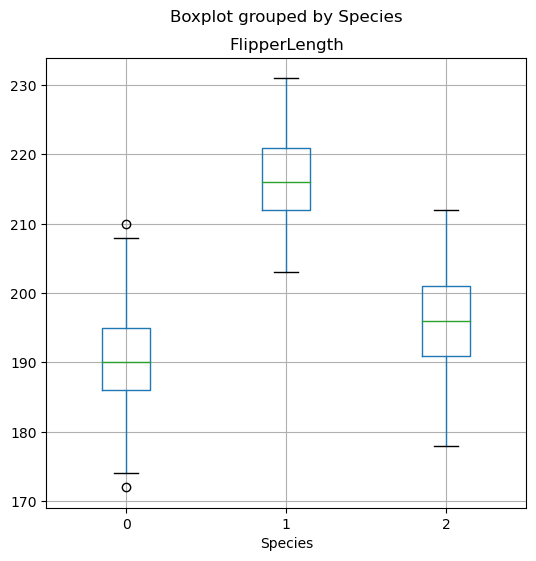

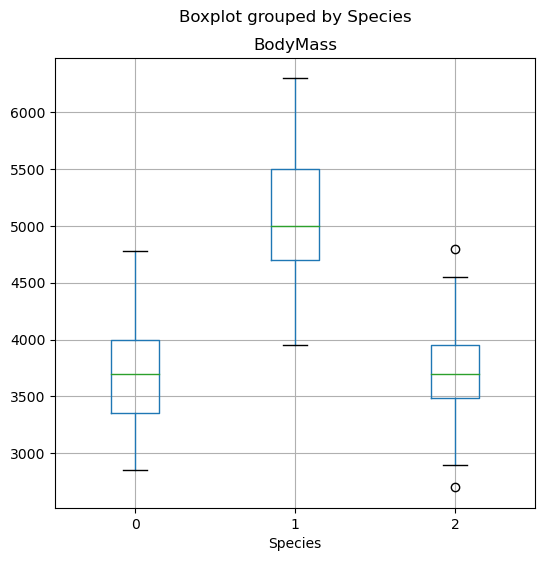

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

penguin_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = 'Species'
for col in penguin_features:
    penguins.boxplot(column=col, by=penguin_label, figsize=(6,6))
    plt.title(col)
plt.show()

From the box plots, it looks like species 0 and 2 (Adelie and Chinstrap) have similar data profiles for culmen depth, flipper length, and body mass, but Chinstraps tend to have longer culmens. Species 1 (Gentoo) tends to have fairly clearly differentiated features from the others; which should help us train a good classification model.

Prepare the data
Just as for binary classification, before training the model, we need to separate the features and label, and then split the data into subsets for training and validation. We'll also apply a stratification technique when splitting the data to maintain the proportion of each label value in the training and validation datasets.

In [20]:
from sklearn.model_selection import train_test_split

# Separate features and labels
penguins_X, penguins_y = penguins[penguin_features].values, penguins[penguin_label].values

# Split data 70%-30% into training set and test set
x_penguin_train, x_penguin_test, y_penguin_train, y_penguin_test = train_test_split(penguins_X, penguins_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=penguins_y)

print ('Training Set: %d, Test Set: %d \n' % (x_penguin_train.shape[0], x_penguin_test.shape[0]))

Training Set: 239, Test Set: 103 



Train and evaluate a multiclass classifier
Now that we have a set of training features and corresponding training labels, we can fit a multiclass classification algorithm to the data to create a model. Most scikit-learn classification algorithms inherently support multiclass classification. We'll try a logistic regression algorithm.

In [21]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_penguin_train, y_penguin_train)
print (multi_model)

LogisticRegression(C=10.0, max_iter=10000)


Now we can use the trained model to predict the labels for the test features, and compare the predicted labels to the actual labels

In [22]:
penguin_predictions = multi_model.predict(x_penguin_test)
print('Predicted labels: ', penguin_predictions[:15])
print('Actual labels   : ' ,y_penguin_test[:15])

Predicted labels:  [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Actual labels   :  [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


In [23]:
#get a classificaton report
from sklearn. metrics import classification_report

print(classification_report(y_penguin_test, penguin_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



As with binary classification, the report includes precision and recall metrics for each class. However, while with binary classification we could focus on the scores for the positive class; in this case, there are multiple classes so we need to look at an overall metric (either the macro or weighted average) to get a sense of how well the model performs across all three classes.

You can get the overall metrics separately from the report using the scikit-learn metrics score classes, but with multiclass results you must specify which average metric you want to use for precision and recall.

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))

Overall Accuracy: 0.970873786407767
Overall Precision: 0.9688405797101449
Overall Recall: 0.9608465608465608


In [25]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_penguin_test, penguin_predictions)
print(mcm)

[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]


The confusion matrix shows the intersection of predicted and actual label values for each class - in simple terms, the diagonal intersections from top-left to bottom-right indicate the number of correct predictions.

When dealing with multiple classes, it's generally more intuitive to visualize this as a heat map, like this:

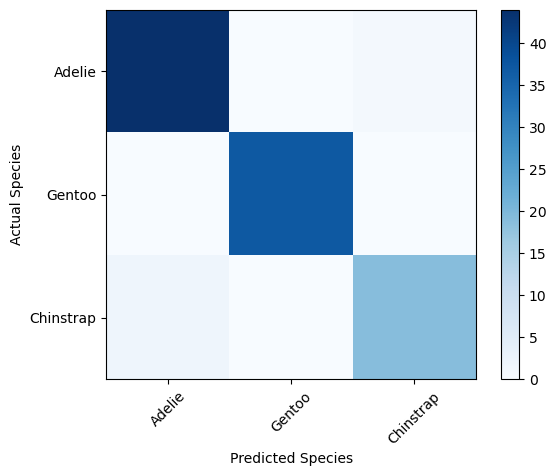

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

The darker squares in the confusion matrix plot indicate high numbers of cases, and you can hopefully see a diagonal line of darker squares indicating cases where the predicted and actual label are the same.

In the case of a multiclass classification model, a single ROC curve showing true positive rate vs false positive rate is not possible. However, you can use the rates for each class in a One vs Rest (OVR) comparison to create a ROC chart for each class.

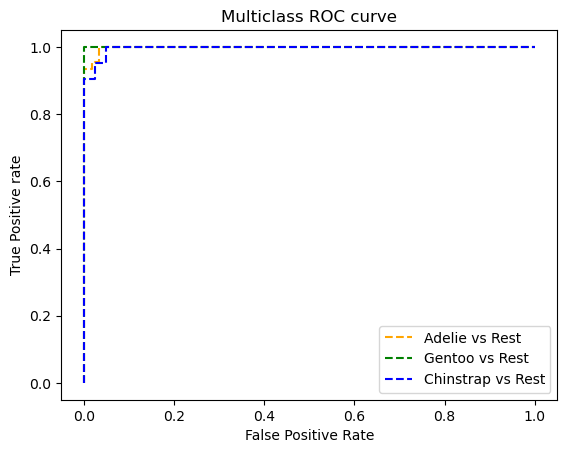

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(penguin_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_penguin_test, penguin_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguin_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguin_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguin_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.

In [28]:
auc = roc_auc_score(y_penguin_test,penguin_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9981999902100828


Preprocess data in a pipeline
Again, just like with binary classification, you can use a pipeline to apply preprocessing steps to the data before fitting it to an algorithm to train a model. Let's see if we can improve the penguin predictor by scaling the numeric features in a transformation steps before training. We'll also try a different algorithm (a support vector machine), just to show that we can!

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(x_penguin_train, y_penguin_train)
print (multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


Overall Accuracy: 0.9805825242718447
Overall Precision: 0.9767195767195768
Overall Recall: 0.9767195767195768
Average AUC: 0.9990361381446328


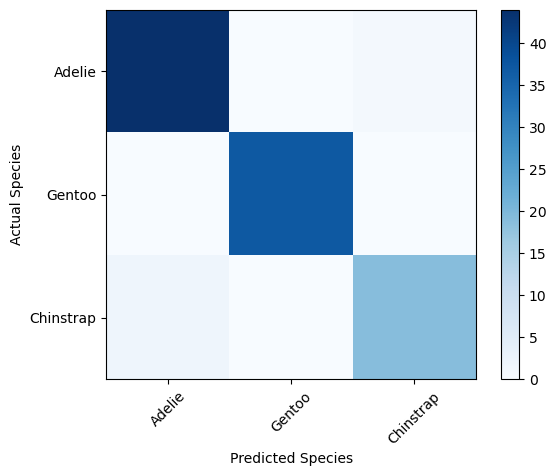

In [30]:
# Get predictions from test data
penguin_predictions = multi_model.predict(x_penguin_test)
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_penguin_test,penguin_prob, multi_class='ovr'))

# Confusion matrix
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [31]:
#Use the model with new data observations
#Now let's save our trained model so we can use it again later.
import joblib

# Save the model as a pickle file
filename = './penguin_model.pkl'
joblib.dump(multi_model, filename)

['./penguin_model.pkl']

In [32]:
#OK, so now we have a trained model. Let's use it to predict the class of a new penguin observation:
# Load the model from the file
multi_model = joblib.load(filename)

# The model accepts an array of feature arrays (so you can predict the classes of multiple penguin observations in a single call)
# We'll create an array with a single array of features, representing one penguin
x_new = np.array([[50.4,15.3,224,5550]])
print ('New sample: {}'.format(x_new[0]))

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one penguin, so our prediction is the first one in the resulting array.
penguin_pred = multi_model.predict(x_new)[0]
print('Predicted class is', penguin_classes[penguin_pred])

New sample: [  50.4   15.3  224.  5550. ]
Predicted class is Gentoo


In [34]:
#You can also submit a batch of penguin observations to the model, and get back a prediction for each one
# This time our input is an array of two feature arrays
x_new = np.array([[49.5,18.4,195, 3600],
         [38.2,20.1,190,3900]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + penguin_classes[prediction] +')')

New samples:
[[  49.5   18.4  195.  3600. ]
 [  38.2   20.1  190.  3900. ]]
2 (Chinstrap)
0 (Adelie)


Clustering
Clustering is the process of grouping objects with similar objects.
A major difference between clustering and classification models is that clustering is an ‘unsupervised’ method, where ‘training’ is done without labels. Instead, models identify examples that have a similar collection of features. 

Clustering is common and useful for exploring new data where patterns between data points, such as high-level categories, are not yet known. It's used in many fields that need to automatically label complex data, including analysis of social networks, brain connectivity, spam filtering, and so on.

Clustering is a form of unsupervised machine learning in which observations are grouped into clusters based on similarities in their data values, or features. This kind of machine learning is considered unsupervised because it does not make use of previously known label values to train a model; in a clustering model, the label is the cluster to which the observation is assigned, based purely on its features.

The goal of the clustering algorithm is to find the optimal way to split the dataset into groups. What ‘optimal’ means depends on both the algorithm used and the dataset that is provided.

In contrast to supervised machine learning, unsupervised learning is used when there is no "ground truth" from which to train and validate label predictions. The most common form of unsupervised learning is clustering, which is simllar conceptually to classification, except that the the training data does not include known values for the class label to be predicted. Clustering works by separating the training cases based on similarities that can be determined from their feature values. Think of it this way; the numeric features of a given entity can be thought of as vector coordinates that define the entity's position in n-dimensional space. What a clustering model seeks to do is to identify groups, or clusters, of entities that are close to one another while being separated from other clusters.

In [1]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

--2022-11-25 11:43:10--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: 'seeds.csv'

     0K .........                                             100%  428K=0.02s

2022-11-25 11:43:11 (428 KB/s) - 'seeds.csv' saved [9386/9386]



,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
35,16.12,15.00,0.9000,5.709,3.485,2.270
206,11.23,12.88,0.8511,5.140,2.795,4.325
45,13.80,14.04,0.8794,5.376,3.155,1.560
49,14.86,14.67,0.8676,5.678,3.258,2.129
17,15.69,14.75,0.9058,5.527,3.514,1.599
33,13.94,14.17,0.8728,5.585,3.150,2.124
25,16.19,15.16,0.8849,5.833,3.421,0.903
21,14.11,14.26,0.8722,5.520,3.168,2.688
156,11.34,12.87,0.8596,5.053,2.849,3.347
102,19.46,16.50,0.8985,6.113,3.892,4.308


As you can see, the dataset contains six data points (or features) for each instance (observation) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot; so we'll take advantage of a mathematical technique called Principal Component Analysis (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the six-dimensional feature values into two-dimensional coordinates.

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

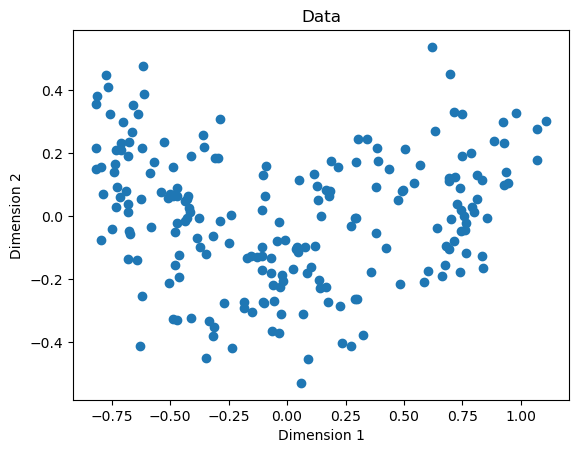

In [3]:
#Now that we have the data points translated to two dimensions, we can visualize them in a plot:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Hopefully you can see at least two, arguably three, reasonably distinct groups of data points; but here lies one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the within cluster sum of squares (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

C:\Users\Win10x64_Bit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


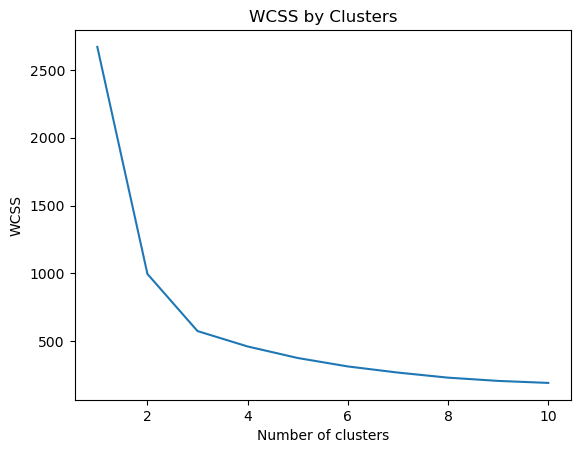

In [4]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The plot shows a large reduction in WCSS (so greater tightness) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

Evaluate different types of clustering
The feature values are vectorized to define n-dimensional coordinates (where n is the number of features). In the flower example, we have two features (number of petals and number of leaves), so the feature vector has two coordinates that we can use to conceptually plot the data points in two-dimensional space.
You decide how many clusters you want to use to group the flowers, and call this value k. For example, to create three clusters, you would use a k value of 3. Then k points are plotted at random coordinates. These points will ultimately be the center points for each cluster, so they're referred to as centroids.
Each data point (in this case flower) is assigned to its nearest centroid.
Each centroid is moved to the center of the data points assigned to it based on the mean distance between the points.
After moving the centroid, the data points may now be closer to a different centroid, so the data points are reassigned to clusters based on the new closest centroid.
The centroid movement and cluster reallocation steps are repeated until the clusters become stable or a pre-determined maximum number of iterations is reached.

Hierarchical Clustering
Hierarchical clustering is another type of clustering algorithm in which clusters themselves belong to a larger group, which belong to even larger groups, and so on. The result is that data points can be clusters in differing degrees of precision: with a large number of very small and precise groups, or a small number of larger groups.

For example, if we apply clustering to the meanings of words, we may get a group containing adjectives specific to emotions (‘angry’, ‘happy’, and so on), which itself belongs to a group containing all human-related adjectives (‘happy’, ‘handsome’, ‘young’), and this belongs to an even higher group containing all adjectives (‘happy’, ‘green’, ‘handsome’, ‘hard’ etc.).

Hierarchical Clustering
Hierarchical clustering is another type of clustering algorithm in which clusters themselves belong to a larger group, which belong to even larger groups, and so on. The result is that data points can be clusters in differing degrees of precision: with a large number of very small and precise groups, or a small number of larger groups.

For example, if we apply clustering to the meanings of words, we may get a group containing adjectives specific to emotions (‘angry’, ‘happy’, and so on), which itself belongs to a group containing all human-related adjectives (‘happy’, ‘handsome’, ‘young’), and this belongs to an even higher group containing all adjectives (‘happy’, ‘green’, ‘handsome’, ‘hard’ etc.).

Hierarchical clustering is useful for not only breaking data into groups, but understanding the relationships between these groups. A major advantage of hierarchical clustering is that it does not require the number of clusters to be defined in advance, and can sometimes provide more interpretable results than non-hierarchical approaches. The major drawback is that these approaches can take much longer to compute than simpler approaches and sometimes are not suitable for large datasets.

Clustering - K-Means and Hierachial exercise is below

In [5]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

--2022-11-25 12:42:11--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: 'seeds.csv.1'

     0K .........                                             100% 30.2K=0.3s

2022-11-25 12:42:14 (30.2 KB/s) - 'seeds.csv.1' saved [9386/9386]



array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

K-Means Clustering
The algorithm we used to create our test clusters is K-Means. This is a commonly used clustering algorithm that separates a dataset into K clusters of equal variance. The number of clusters, K, is user defined. The basic algorithm has the following steps:

A set of K centroids are randomly chosen.
Clusters are formed by assigning the data points to their closest centroid.
The means of each cluster is computed and the centroid is moved to the mean.
Steps 2 and 3 are repeated until a stopping criteria is met. Typically, the algorithm terminates when each new iteration results in negligable movement of centroids and the clusters become static.
When the clusters stop changing, the algorithm has converged, defining the locations of the clusters - note that the random starting point for the centroids means that re-running the algorithm could result in slightly different clusters, so training usually involves multiple iterations, reinitializing the centroids each time, and the model with the best WCSS is selected.
Let's try using K-Means on our seeds data with a K value of 3.

In [6]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

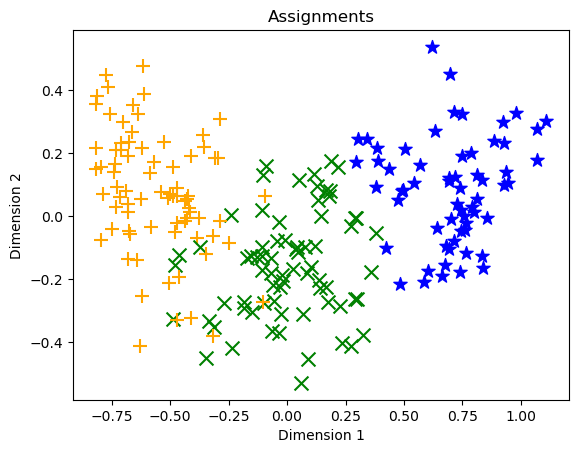

In [7]:
#Let's see those cluster assignments with the two-dimensional data points.
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

Hopefully, the the data has been separated into three distinct clusters.

So what's the practical use of clustering? In some cases, you may have data that you need to group into distict clusters without knowing how many clusters there are or what they indicate. For example a marketing organization might want to separate customers into distinct segments, and then investigate how those segments exhibit different purchasing behaviors.

Sometimes, clustering is used as an initial step towards creating a classification model. You start by identifying distinct groups of data points, and then assign class labels to those clusters. You can then use this labelled data to train a classification model.

In the case of the seeds data, the different species of seed are already known and encoded as 0 (Kama), 1 (Rosa), or 2 (Canadian), so we can use these identifiers to compare the species classifications to the clusters identified by our unsupervised algorithm

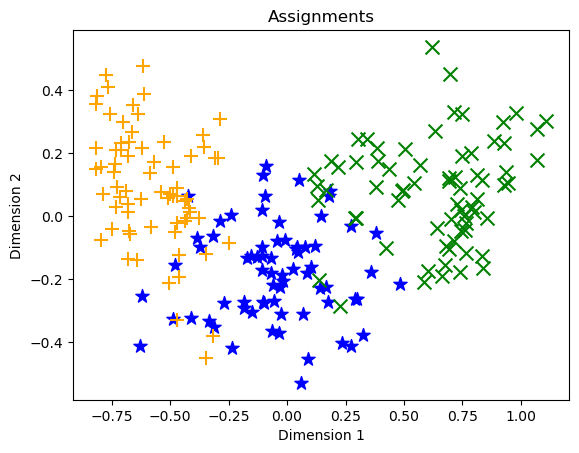

In [8]:
seed_species = data[data.columns[7]]
plot_clusters(features_2d, seed_species.values)

There may be some differences between the cluster assignments and class labels, but the K-Means model should have done a reasonable job of clustering the observations so that seeds of the same species are generally in the same cluster.

Hierarchical Clustering
Hierarchical clustering methods make fewer distributional assumptions when compared to K-means methods. However, K-means methods are generally more scalable, sometimes very much so.

Hierarchical clustering creates clusters by either a divisive method or agglomerative method. The divisive method is a "top down" approach starting with the entire dataset and then finding partitions in a stepwise manner. Agglomerative clustering is a "bottom up** approach. In this lab you will work with agglomerative clustering which roughly works as follows:

The linkage distances between each of the data points is computed.
Points are clustered pairwise with their nearest neighbor.
Linkage distances between the clusters are computed.
Clusters are combined pairwise into larger clusters.
Steps 3 and 4 are repeated until all data points are in a single cluster.

The linkage function can be computed in a number of ways:

Ward linkage measures the increase in variance for the clusters being linked,
Average linkage uses the mean pairwise distance between the members of the two clusters,
Complete or Maximal linkage uses the maximum distance between the members of the two clusters.
Several different distance metrics are used to compute linkage functions:

Euclidian or l2 distance is the most widely used. This metric is only choice for the Ward linkage method.
Manhattan or l1 distance is robust to outliers and has other interesting properties.
Cosine similarity, is the dot product between the location vectors divided by the magnitudes of the vectors. Notice that this metric is a measure of similarity, whereas the other two metrics are measures of difference. Similarity can be quite useful when working with data such as images or text documents.

In [9]:
#Agglomerative Clustering
#Let's see an example of clustering the seeds data using an agglomerative clustering algorithm.
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(features.values)
agg_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

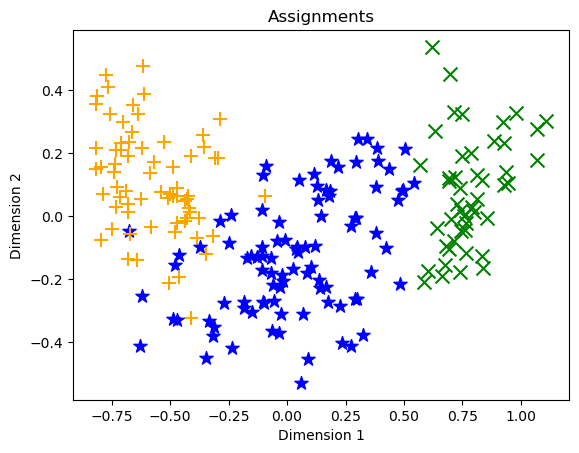

In [10]:
# agglomerative cluster assignments look like the following
import matplotlib.pyplot as plt

%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, agg_clusters)
